In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn import preprocessing
from sklearn import utils
from sklearn.cluster import KMeans
sb.set() # set the default Seaborn style for graphics

## IMPORTING AND CLEANING DATASET

In [2]:
#IMPORTING ANIME.CSV

animeData = pd.read_csv('anime.csv')
animeData.head()

C:\Users\Tharun1207\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MAL_ID,Name,Score,Genres,Genre 1,Genre2,Genre 2,Genre3,Genre 3,Genre4,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Adventure,Comedy,Comedy,Drama,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Drama,Mystery,Mystery,Sci-Fi,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Sci-Fi,Adventure,Adventure,Comedy,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Mystery,Police,Police,Supernatural,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Fantasy,Shounen,Shounen,Supernatural,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [3]:
#REMOVING UNWANTED COLUMNS

animeData1 = animeData.drop(columns = ['Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10', 'Genre11', 'Genre12', 'Genre13', 'Studio2', 'Studio3', 'Studio4', 'Studio5', 'Studio6', 'Studio7'])
animeData1.head()

,MAL_ID,Name,Score,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Mystery,Sci-Fi,Space,NaN,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Police,Supernatural,Drama,Magic,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [4]:
#REMOVING UNWANTED COLUMNS

animeDataUpdated = animeData1.drop(columns = ['Japanese name', 'Premiered', 'Members', 'Favorites', 'Popularity', 'Watching', 'Plan to Watch', 'Producers', 'Producer 1', 'Producer 2', 'Producer 3', 'Producer 4', 'Producer 5', 'Producer 6', 'Producer 7', 'Producer 8', 'Producer 9', 'Producer 10', 'Producer 11', 'Producer 12', 'Producer 13', 'Producer 14', 'Producer 15', 'Producer 16', 'Producer 17', 'Producer 18', 'Producer 19', 'Producer 20', 'Licensors', 'Licensor 1', 'Licensor 2', 'Licensor 3', 'Licensor 4'])
animeDataUpdated.head()

,MAL_ID,Name,Score,Genres,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Mystery,Sci-Fi,Space,NaN,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Police,Supernatural,Drama,Magic,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


In [5]:
animeDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17562 non-null  int64 
 1   Name                   17562 non-null  object
 2   Score                  17562 non-null  object
 3   Genres                 17562 non-null  object
 4   Genre 1                17562 non-null  object
 5   Genre 2                13270 non-null  object
 6   Genre 3                9029 non-null   object
 7   Genre 4                5534 non-null   object
 8   Genre 5                2959 non-null   object
 9   Genre 6                1237 non-null   object
 10  Genre 7                439 non-null    object
 11  Genre 8                143 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [6]:
# Removing unknown rows from genres
animeDFClean = animeDataUpdated[animeDataUpdated['Genres'] != 'Unknown']
animeDFClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17499 non-null  int64 
 1   Name                   17499 non-null  object
 2   Score                  17499 non-null  object
 3   Genres                 17499 non-null  object
 4   Genre 1                17499 non-null  object
 5   Genre 2                13270 non-null  object
 6   Genre 3                9029 non-null   object
 7   Genre 4                5534 non-null   object
 8   Genre 5                2959 non-null   object
 9   Genre 6                1237 non-null   object
 10  Genre 7                439 non-null    object
 11  Genre 8                143 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [7]:
# Removing invalid columns under Completion Percentage
animeDFClean1 = animeDFClean[animeDFClean['Completion Percentage'] != '#DIV/0!']
animeDFClean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17208 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17208 non-null  int64 
 1   Name                   17208 non-null  object
 2   Score                  17208 non-null  object
 3   Genres                 17208 non-null  object
 4   Genre 1                17208 non-null  object
 5   Genre 2                13034 non-null  object
 6   Genre 3                8866 non-null   object
 7   Genre 4                5444 non-null   object
 8   Genre 5                2907 non-null   object
 9   Genre 6                1214 non-null   object
 10  Genre 7                432 non-null    object
 11  Genre 8                141 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [8]:
##REMOVING 'RX-HENTAI' DUE TO ITS LARGE UNKNOWN VALUE COUNTS AS WELL AS INAPPROPRIATENESS

animeDFClean2 = animeDFClean1[animeDFClean1['Rating'] != 'Rx - Hentai']
animeDFClean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15865 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 15865 non-null  int64 
 1   Name                   15865 non-null  object
 2   Score                  15865 non-null  object
 3   Genres                 15865 non-null  object
 4   Genre 1                15865 non-null  object
 5   Genre 2                12658 non-null  object
 6   Genre 3                8669 non-null   object
 7   Genre 4                5345 non-null   object
 8   Genre 5                2871 non-null   object
 9   Genre 6                1205 non-null   object
 10  Genre 7                428 non-null    object
 11  Genre 8                138 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

In [9]:
#CHANGING DATA UNDER COMPLETION PERCENTAGE TO NUMERIC FORM

animeDFClean2['Completion Percentage'] = pd.to_numeric(animeDFClean2['Completion Percentage'])

<ipython-input-9-9edd06c300d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animeDFClean2['Completion Percentage'] = pd.to_numeric(animeDFClean2['Completion Percentage'])


In [10]:
#REMOVING RESIDUAL ANIME COLUMNS WITH RX-HENTAI

animeDFClean3 = animeDFClean2[animeDFClean2['Genre 2'] != 'Hentai']
animeDFClean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15864 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MAL_ID                 15864 non-null  int64  
 1   Name                   15864 non-null  object 
 2   Score                  15864 non-null  object 
 3   Genres                 15864 non-null  object 
 4   Genre 1                15864 non-null  object 
 5   Genre 2                12657 non-null  object 
 6   Genre 3                8668 non-null   object 
 7   Genre 4                5344 non-null   object 
 8   Genre 5                2870 non-null   object 
 9   Genre 6                1204 non-null   object 
 10  Genre 7                428 non-null    object 
 11  Genre 8                138 non-null    object 
 12  Genre 9                58 non-null     object 
 13  Genre 10               21 non-null     object 
 14  Genre 11               7 non-null      object 
 15  Ge

In [11]:
#REMOVING RESIDUAL ANIME COLUMNS WITH RX-HENTAI

animeDFClean4 = animeDFClean3[animeDFClean3['Genre 3'] != 'Hentai']
animeDFClean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MAL_ID                 15862 non-null  int64  
 1   Name                   15862 non-null  object 
 2   Score                  15862 non-null  object 
 3   Genres                 15862 non-null  object 
 4   Genre 1                15862 non-null  object 
 5   Genre 2                12655 non-null  object 
 6   Genre 3                8666 non-null   object 
 7   Genre 4                5344 non-null   object 
 8   Genre 5                2870 non-null   object 
 9   Genre 6                1204 non-null   object 
 10  Genre 7                428 non-null    object 
 11  Genre 8                138 non-null    object 
 12  Genre 9                58 non-null     object 
 13  Genre 10               21 non-null     object 
 14  Genre 11               7 non-null      object 
 15  Ge

## EXPLORATORY DATA ANALYSIS FOR GENRES

## Finding most prominent genres (Top 5 genres in terms of frequency)

In [12]:
# Dataframe for all the columns of genres
genresDF = pd.DataFrame(animeDFClean4[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6', 'Genre 7', 'Genre 8', 'Genre 9', 'Genre 10', 'Genre 11', 'Genre 12', 'Genre 13']])
genresDF.head()

,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8,Genre 9,Genre 10,Genre 11,Genre 12,Genre 13
0,Action,Adventure,Comedy,Drama,Sci-Fi,Space,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Action,Drama,Mystery,Sci-Fi,Space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Action,Mystery,Police,Supernatural,Drama,Magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adventure,Fantasy,Shounen,Supernatural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# GETTING TOP 5 GENRES UNDER EACH COLUMN

n = 5
top5_genres1 = genresDF['Genre 1'].value_counts()[:n].to_dict()
top5_genres2 = genresDF['Genre 2'].value_counts()[:n].to_dict()
top5_genres3 = genresDF['Genre 3'].value_counts()[:n].to_dict()
top5_genres4 = genresDF['Genre 4'].value_counts()[:n].to_dict()
top5_genres5 = genresDF['Genre 5'].value_counts()[:n].to_dict()
top5_genres6 = genresDF['Genre 6'].value_counts()[:n].to_dict()
top5_genres7 = genresDF['Genre 7'].value_counts()[:n].to_dict()
top5_genres8 = genresDF['Genre 8'].value_counts()[:n].to_dict()
top5_genres9 = genresDF['Genre 9'].value_counts()[:n].to_dict()
top5_genres10 = genresDF['Genre 10'].value_counts()[:n].to_dict()
top5_genres11 = genresDF['Genre 11'].value_counts()[:n].to_dict()
top5_genres12 = genresDF['Genre 12'].value_counts()[:n].to_dict()
top5_genres13 = genresDF['Genre 13'].value_counts()[:n].to_dict()

print('Top 5 Genres for Genre 1:', top5_genres1)
print('Top 5 Genres for Genre 2:',top5_genres2)
print('Top 5 Genres for Genre 3:',top5_genres3)
print('Top 5 Genres for Genre 4:',top5_genres4)
print('Top 5 Genres for Genre 5:',top5_genres5)
print('Top 5 Genres for Genre 6:',top5_genres6)
print('Top 5 Genres for Genre 7:',top5_genres7)
print('Top 5 Genres for Genre 8:',top5_genres8)
print('Top 5 Genres for Genre 9:',top5_genres9)
print('Top 5 Genres for Genre 10:',top5_genres10)
print('Top 5 Genres for Genre 11:',top5_genres11)
print('Top 5 Genres for Genre 12:',top5_genres12)
print('Top 5 Genres for Genre 13:',top5_genres13)

Top 5 Genres for Genre 1: {'Action': 3751, 'Comedy': 3067, 'Adventure': 1456, 'Music': 1424, 'Kids': 1078}
Top 5 Genres for Genre 2: {'Comedy': 1907, 'Adventure': 1207, 'Kids': 936, 'Fantasy': 894, 'Drama': 808}
Top 5 Genres for Genre 3: {'Fantasy': 869, 'Comedy': 750, 'Romance': 574, 'Sci-Fi': 529, 'School': 506}
Top 5 Genres for Genre 4: {'Shounen': 542, 'Fantasy': 465, 'Romance': 394, 'Sci-Fi': 343, 'School': 336}
Top 5 Genres for Genre 5: {'Shounen': 470, 'Fantasy': 253, 'Sci-Fi': 217, 'Supernatural': 192, 'School': 181}
Top 5 Genres for Genre 6: {'Shounen': 252, 'Fantasy': 113, 'Supernatural': 98, 'Sci-Fi': 84, 'Romance': 64}
Top 5 Genres for Genre 7: {'Shounen': 109, 'Supernatural': 30, 'School': 27, 'Super Power': 25, 'Fantasy': 24}
Top 5 Genres for Genre 8: {'Shounen': 28, 'Fantasy': 16, 'Romance': 10, 'School': 9, 'Space': 8}
Top 5 Genres for Genre 9: {'Supernatural': 11, 'School': 8, 'Romance': 8, 'Seinen': 6, 'Shounen': 6}
Top 5 Genres for Genre 10: {'Supernatural': 7, 'Shou

In [14]:
# FINDING TOP 5 GENRES OVERALL

import collections

genre1_Counter = collections.Counter(top5_genres1)
genre2_Counter = collections.Counter(top5_genres2)
genre3_Counter = collections.Counter(top5_genres3)
genre4_Counter = collections.Counter(top5_genres4)
genre5_Counter = collections.Counter(top5_genres5)
genre6_Counter = collections.Counter(top5_genres6)
genre7_Counter = collections.Counter(top5_genres7)
genre8_Counter = collections.Counter(top5_genres8)
genre9_Counter = collections.Counter(top5_genres9)
genre10_Counter = collections.Counter(top5_genres10)
genre11_Counter = collections.Counter(top5_genres11)
genre12_Counter = collections.Counter(top5_genres12)
genre13_Counter = collections.Counter(top5_genres13)

addDictGenres = genre1_Counter + genre2_Counter + genre3_Counter + genre4_Counter + genre5_Counter + genre6_Counter + genre7_Counter + genre8_Counter + genre9_Counter + genre10_Counter + genre11_Counter + genre12_Counter + genre13_Counter
top5 = dict(addDictGenres)

n = 5
from operator import itemgetter
top5Genres = dict(sorted(top5.items(), key = itemgetter(1), reverse = True)[:n])

print('The top 5 genres are:', top5Genres)

The top 5 genres are: {'Comedy': 5724, 'Action': 3751, 'Adventure': 2663, 'Fantasy': 2638, 'Kids': 2014}


In [15]:
#CONVERTING TO DATAFRAME

top5GenresDF = pd.DataFrame.from_dict(top5Genres, orient='index')
top5GenresDF.rename(columns = {0: 'Count'}, inplace = True)
top5GenresDF.head()

,Count
Comedy,5724
Action,3751
Adventure,2663
Fantasy,2638
Kids,2014


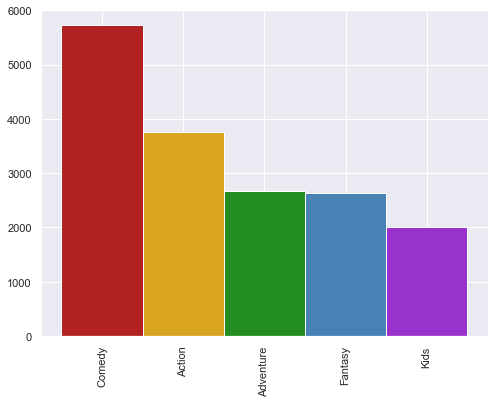

In [16]:
# HISTOGRAM FOR TOP 5 GENRES

fig = plt.figure(figsize=(8,6)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
c = ['firebrick', 'goldenrod', 'forestgreen', 'steelblue', 'darkorchid']

ax.bar(range(0, len(top5Genres.keys())), top5Genres.values(), width = 1.0, color = c)
ax.set_xticks(np.arange(0, len(top5Genres.keys())))
ax.set_xticklabels(top5Genres.keys())

locs, labels = plt.xticks() # gets labels
plt.setp(labels, rotation = 90) # sets rotation of the labels

plt.show()

## ANALYSIS OF GENRES

In [17]:
# Separating data into respective dataframes to conduct K-Means

genre1_completePrc = pd.DataFrame(animeDFClean4[['Genre 1', 'Completion Percentage']])
print(genre1_completePrc.info())
print()
genre2_completePrc = pd.DataFrame(animeDFClean4[['Genre 2', 'Completion Percentage']])
print(genre2_completePrc.info())
print()
genre3_completePrc = pd.DataFrame(animeDFClean4[['Genre 3', 'Completion Percentage']])
print(genre3_completePrc.info())
print()
genre4_completePrc = pd.DataFrame(animeDFClean4[['Genre 4', 'Completion Percentage']])
print(genre4_completePrc.info())
print()
genre5_completePrc = pd.DataFrame(animeDFClean4[['Genre 5', 'Completion Percentage']])
print(genre5_completePrc.info())
print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 1                15862 non-null  object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 371.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 2                12655 non-null  object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 371.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 3                8666 non

In [18]:
# Finding the number of unique genres in each dataframe

print(genre1_completePrc.nunique())
print(genre2_completePrc.nunique())
print(genre3_completePrc.nunique())
print(genre4_completePrc.nunique())
print(genre5_completePrc.nunique())

Genre 1                     40
Completion Percentage    13074
dtype: int64
Genre 2                     40
Completion Percentage    13074
dtype: int64
Genre 3                     40
Completion Percentage    13074
dtype: int64
Genre 4                     40
Completion Percentage    13074
dtype: int64
Genre 5                     38
Completion Percentage    13074
dtype: int64


#### Genre 1 - Completion Percentage Analysis

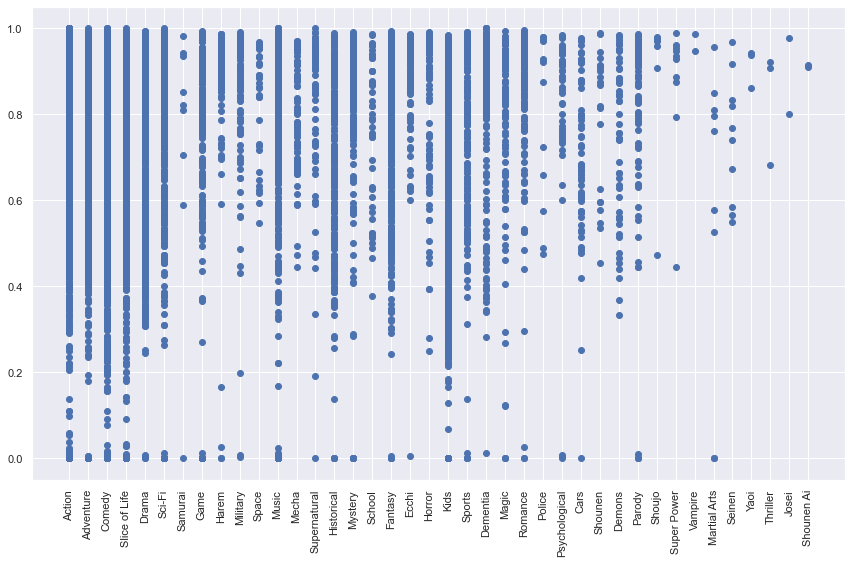

In [19]:
# Scatter plot for Genre 1 with Completion Percentage

plt.scatter(genre1_completePrc['Genre 1'], genre1_completePrc['Completion Percentage'])
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [20]:
# Encoding genres under genre 1 and forming new column in main dataframe
genre1_completePrc['Genre 1'] = genre1_completePrc['Genre 1'].astype('category')
genre1_completePrc['Genre 1 Encoded'] = genre1_completePrc['Genre 1'].cat.codes
genre1_completePrc

,Genre 1,Completion Percentage,Genre 1 Encoded
0,Action,0.879720,0
1,Action,0.987182,0
2,Action,0.897122,0
3,Action,0.814715,0
4,Adventure,0.796038,1
...,...,...,...
17555,Sci-Fi,0.000000,27
17556,Adventure,0.000000,1
17558,Comedy,0.000000,3
17560,Adventure,0.400000,1


In [21]:
# Table to see mapping of different types of sources
genre1DFMain = pd.DataFrame(genre1_completePrc[['Genre 1', 'Genre 1 Encoded']])
genre1DFMain.value_counts()

Genre 1        Genre 1 Encoded
Action         0                  3751
Comedy         3                  3067
Adventure      1                  1456
Music          19                 1424
Kids           14                 1078
Slice of Life  32                  942
Drama          6                   775
Sci-Fi         27                  510
Fantasy        8                   481
Dementia       4                   379
Historical     11                  257
Mystery        20                  181
Game           9                   181
Sports         34                  162
Romance        24                  143
Ecchi          7                   130
Harem          10                  114
Magic          15                  107
Military       18                   99
Mecha          17                   82
Horror         12                   80
Parody         21                   71
Cars           2                    62
Supernatural   36                   60
Demons         5                 

## ENCODING

In [22]:
# Label encoding Genre 1's genres

le = preprocessing.LabelEncoder()
genre1_encoded = le.fit_transform(genre1_completePrc['Genre 1'])
print(genre1_encoded)
print(utils.multiclass.type_of_target(genre1_encoded))
print(utils.multiclass.type_of_target(genre1_encoded.astype('int')))
print(utils.multiclass.type_of_target(genre1_encoded))

[0 0 0 ... 3 1 0]
multiclass
multiclass
multiclass


In [23]:
# Initialise X1 and Y1

X1 = genre1_encoded.reshape(-1,1)
y1 = genre1_completePrc['Completion Percentage']

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

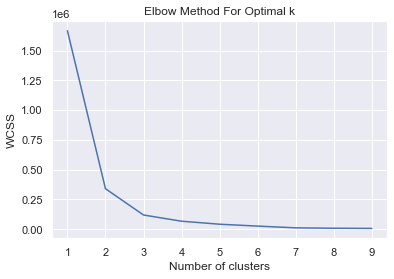

In [25]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(X1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

numClusters1 = range(1,10)
plt.plot(numClusters1, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.7560270106514325
For n_clusters = 4 The average silhouette_score is : 0.7017152462081485
For n_clusters = 5 The average silhouette_score is : 0.7290626269326468


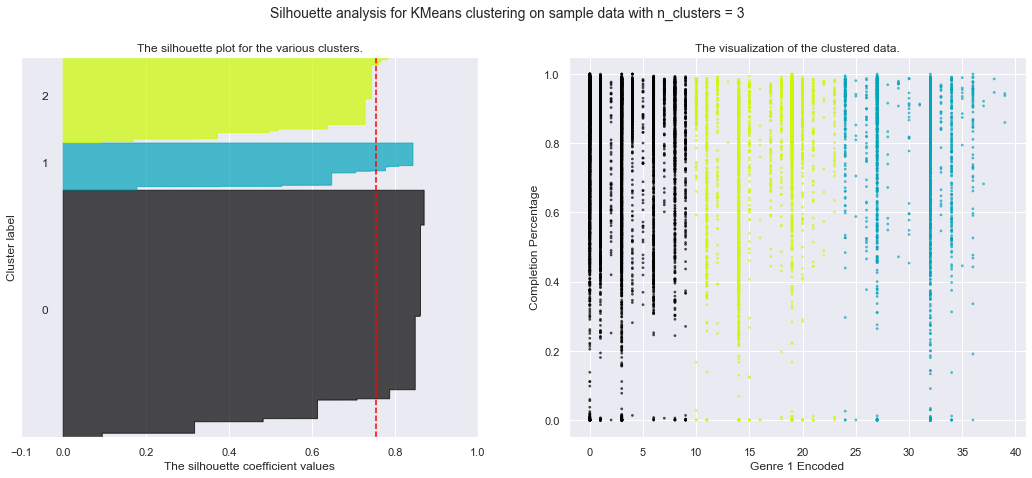

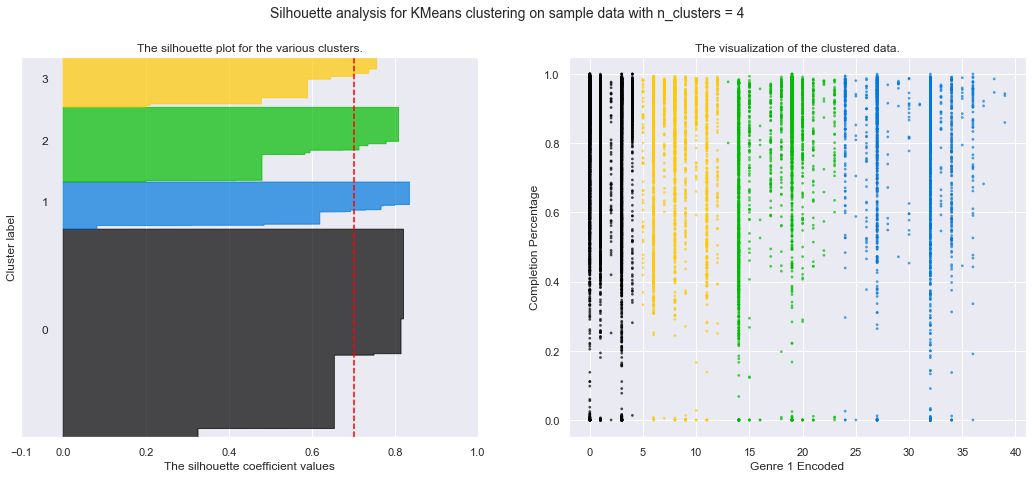

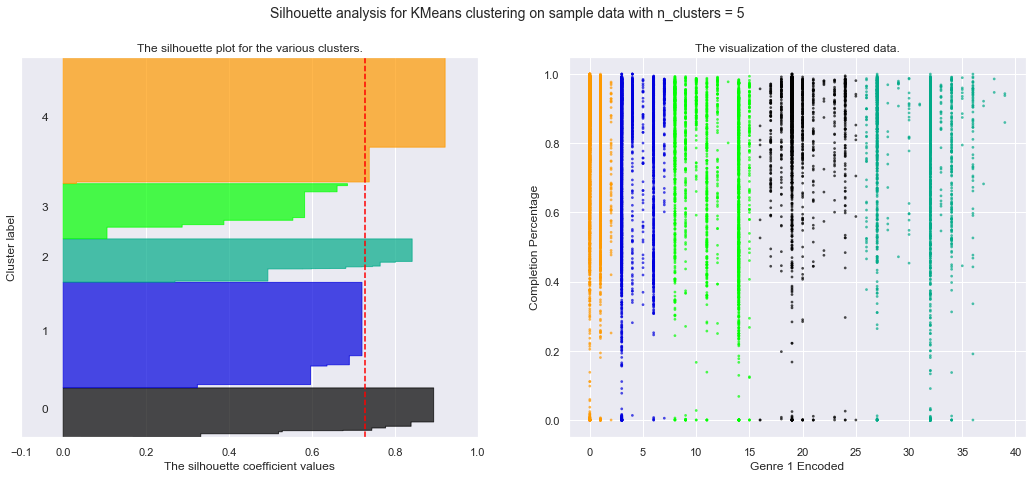

In [24]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y1_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y1_upper = y1_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y1_lower, y1_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y1_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y1_lower = y1_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X1, y1, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Genre 1 Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## K-MEANS ALGORITHM

In [26]:
kmeans = KMeans(3)
kmeans.fit(X1)

KMeans(n_clusters=3)

In [27]:
identified_clusters1 = kmeans.fit_predict(X1)
identified_clusters1

array([1, 1, 1, ..., 1, 1, 1])

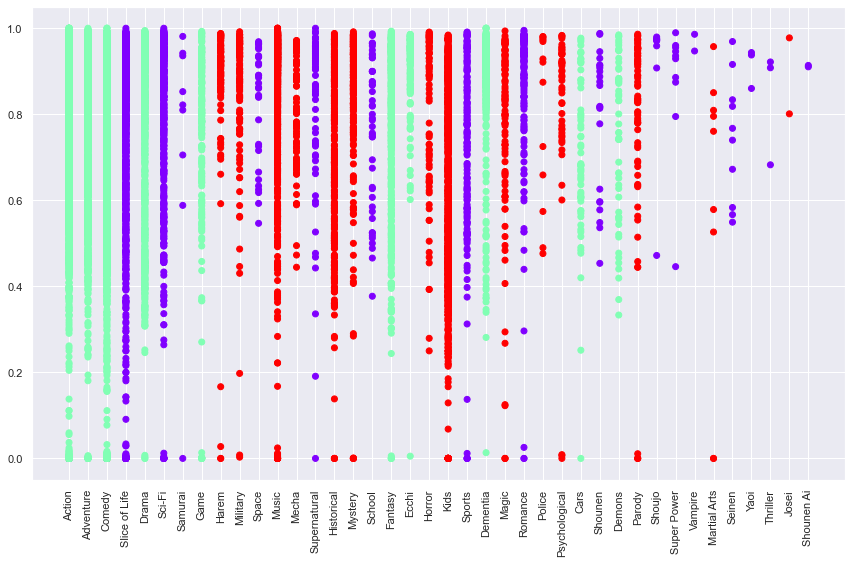

In [28]:
# Scatter Plot of genres broken down into different genres
data_with_clusters1 = genre1_completePrc.copy()
data_with_clusters1['Clusters'] = identified_clusters1 
plt.scatter(data_with_clusters1['Genre 1'], data_with_clusters1['Completion Percentage'], c = data_with_clusters1['Clusters'], cmap='rainbow')
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS (GENRE 1)

In [29]:
# Inserting column for clusters
genre1_completePrc.insert(0, 'Cluster', identified_clusters1, True)

In [30]:
# Separating Cluster 0 members

cluster0_genre1 = genre1_completePrc.query('Cluster == 0')
print(cluster0_genre1)

# Finding the genres in Cluster 0
cluster0_genre1['Genre 1'].unique()

       Cluster        Genre 1  Completion Percentage  Genre 1 Encoded
7            0  Slice of Life               0.873463               32
22           0         Sci-Fi               0.991865               27
27           0        Samurai               0.981051               25
33           0         Sci-Fi               0.857797               27
40           0         Sci-Fi               0.870601               27
...        ...            ...                    ...              ...
17536        0   Supernatural               1.000000               36
17537        0         Sports               0.000000               34
17549        0  Slice of Life               0.363636               32
17551        0  Slice of Life               0.000000               32
17555        0         Sci-Fi               0.000000               27

[1962 rows x 4 columns]


['Slice of Life', 'Sci-Fi', 'Samurai', 'Space', 'Supernatural', ..., 'Vampire', 'Seinen', 'Yaoi', 'Thriller', 'Shounen Ai']
Length: 16
Categories (16, object): ['Slice of Life', 'Sci-Fi', 'Samurai', 'Space', ..., 'Seinen', 'Yaoi', 'Thriller', 'Shounen Ai']

In [31]:
# Separating Cluster 1 members

cluster1_genre1 = genre1_completePrc.query('Cluster == 1')
print(cluster1_genre1)

# Finding the genres in Cluster 1
cluster1_genre1['Genre 1'].unique()

       Cluster    Genre 1  Completion Percentage  Genre 1 Encoded
0            1     Action               0.879720                0
1            1     Action               0.987182                0
2            1     Action               0.897122                0
3            1     Action               0.814715                0
4            1  Adventure               0.796038                1
...        ...        ...                    ...              ...
17552        1     Comedy               0.986045                3
17556        1  Adventure               0.000000                1
17558        1     Comedy               0.000000                3
17560        1  Adventure               0.400000                1
17561        1     Action               0.000000                0

[10336 rows x 4 columns]


['Action', 'Adventure', 'Comedy', 'Drama', 'Game', 'Fantasy', 'Ecchi', 'Dementia', 'Cars', 'Demons']
Categories (10, object): ['Action', 'Adventure', 'Comedy', 'Drama', ..., 'Ecchi', 'Dementia', 'Cars', 'Demons']

In [32]:
# Separating Cluster 2 members

cluster2_genre1 = genre1_completePrc.query('Cluster == 2')
print(cluster2_genre1)

# Finding the genres in Cluster 2
cluster2_genre1['Genre 1'].unique()

       Cluster       Genre 1  Completion Percentage  Genre 1 Encoded
34           2         Harem               0.857614               10
43           2         Harem               0.843385               10
58           2         Harem               0.869598               10
61           2      Military               0.968263               18
62           2      Military               0.968998               18
...        ...           ...                    ...              ...
17510        2       Mystery               0.000000               20
17513        2       Mystery               0.962311               20
17524        2  Martial Arts               0.000000               16
17526        2         Music               0.925000               19
17543        2         Magic               0.294118               15

[3564 rows x 4 columns]


['Harem', 'Military', 'Music', 'Mecha', 'Historical', ..., 'Police', 'Psychological', 'Parody', 'Martial Arts', 'Josei']
Length: 14
Categories (14, object): ['Harem', 'Military', 'Music', 'Mecha', ..., 'Psychological', 'Parody', 'Martial Arts', 'Josei']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

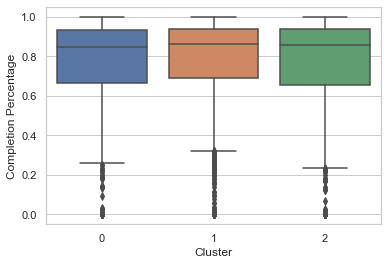

In [33]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = genre1_completePrc)

In [34]:
# Summary Stats of each cluster

print(cluster0_genre1.describe())
print()
print(cluster1_genre1.describe())
print()
print(cluster2_genre1.describe())
print()

       Cluster  Completion Percentage  Genre 1 Encoded
count   1962.0            1962.000000      1962.000000
mean       0.0               0.767646        30.234455
std        0.0               0.228820         3.208873
min        0.0               0.000000        24.000000
25%        0.0               0.662891        27.000000
50%        0.0               0.846865        32.000000
75%        0.0               0.935001        32.000000
max        0.0               1.000000        39.000000

       Cluster  Completion Percentage  Genre 1 Encoded
count  10336.0           10336.000000     10336.000000
mean       1.0               0.790218         2.283669
std        0.0               0.203668         2.459784
min        1.0               0.000000         0.000000
25%        1.0               0.692308         0.000000
50%        1.0               0.862130         1.000000
75%        1.0               0.939735         3.000000
max        1.0               1.000000         9.000000

       C

#### In Genre 1, 'Action', 'Adventure', 'Comedy', 'Drama', 'Game', 'Fantasy', 'Ecchi', 'Dementia', 'Cars', 'Demons' seems to have the best completion rate 

#### Genre 2 - Completion Percentage Analysis

In [35]:
genre2_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 2                12655 non-null  object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 887.8+ KB


In [36]:
# Replacing empty cells with NaN values
genre2_completePrc.replace(r'^\s*$', np.nan, regex=True)

,Genre 2,Completion Percentage
0,Adventure,0.879720
1,Drama,0.987182
2,Sci-Fi,0.897122
3,Mystery,0.814715
4,Fantasy,0.796038
...,...,...
17555,Space,0.000000
17556,Fantasy,0.000000
17558,Horror,0.000000
17560,Slice of Life,0.400000


In [37]:
# Dropping rows with NaN values
genre2_completePrc = genre2_completePrc.dropna()

In [38]:
genre2_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12655 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 2                12655 non-null  object 
 1   Completion Percentage  12655 non-null  float64
dtypes: float64(1), object(1)
memory usage: 296.6+ KB


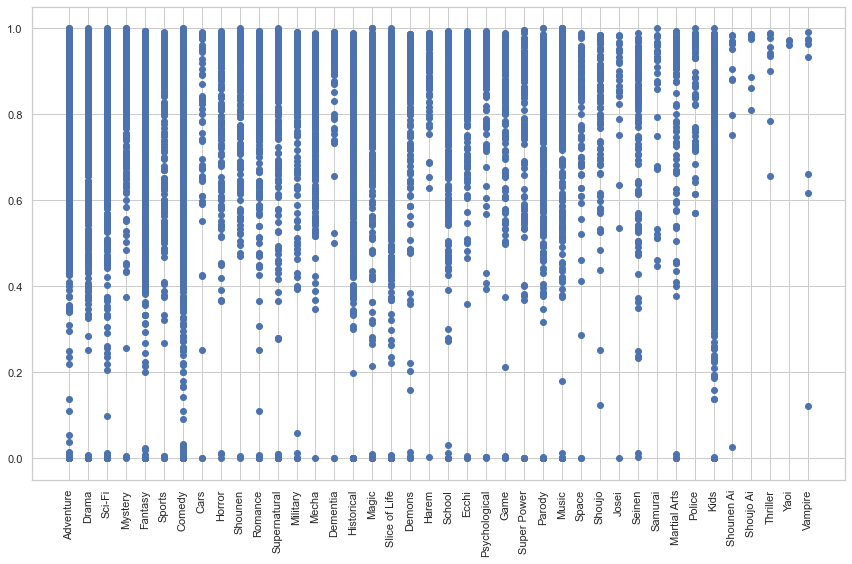

In [39]:
# Scatter plot for Genre 2 with Completion Percentage

plt.scatter(genre2_completePrc['Genre 2'], genre2_completePrc['Completion Percentage'])
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [40]:
# Adding encoded genres to dataframe
genre2_completePrc['Genre 2'] = genre2_completePrc['Genre 2'].astype('category')
genre2_completePrc['Genre 2 Encoded'] = genre2_completePrc['Genre 2'].cat.codes
genre2_completePrc

,Genre 2,Completion Percentage,Genre 2 Encoded
0,Adventure,0.879720,0
1,Drama,0.987182,5
2,Sci-Fi,0.897122,26
3,Mystery,0.814715,19
4,Fantasy,0.796038,7
...,...,...,...
17555,Space,0.000000,33
17556,Fantasy,0.000000,7
17558,Horror,0.000000,11
17560,Slice of Life,0.400000,32


In [41]:
# Table to see mapping of different types of genres in Genre 2
genre2DFMain = pd.DataFrame(genre2_completePrc[['Genre 2', 'Genre 2 Encoded']])
genre2DFMain.value_counts()

Genre 2        Genre 2 Encoded
Comedy         2                  1907
Adventure      0                  1207
Kids           13                  936
Fantasy        7                   894
Drama          5                   808
Sci-Fi         26                  775
Music          18                  629
Historical     10                  458
Romance        23                  443
Slice of Life  32                  437
School         25                  370
Parody         20                  334
Magic          14                  305
Mecha          16                  298
Ecchi          6                   284
Supernatural   36                  243
Mystery        19                  242
Sports         34                  236
Military       17                  230
Horror         11                  169
Demons         4                   168
Shounen        30                  149
Game           8                   131
Super Power    35                  114
Seinen         27                

## ENCODING

In [42]:
# Label encoding Genre 2's genres

genre2_encoded = le.fit_transform(genre2_completePrc['Genre 2'])
print(genre2_encoded)
print(utils.multiclass.type_of_target(genre2_encoded))
print(utils.multiclass.type_of_target(genre2_encoded.astype('int')))
print(utils.multiclass.type_of_target(genre2_encoded))

[ 0  5 26 ... 11 32  7]
multiclass
multiclass
multiclass


In [43]:
# Initialise X2 and Y2

X2 = genre2_encoded.reshape(-1,1)
y2 = genre2_completePrc['Completion Percentage']

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.6502731174975378
For n_clusters = 4 The average silhouette_score is : 0.651389554022867
For n_clusters = 5 The average silhouette_score is : 0.6557054450537108


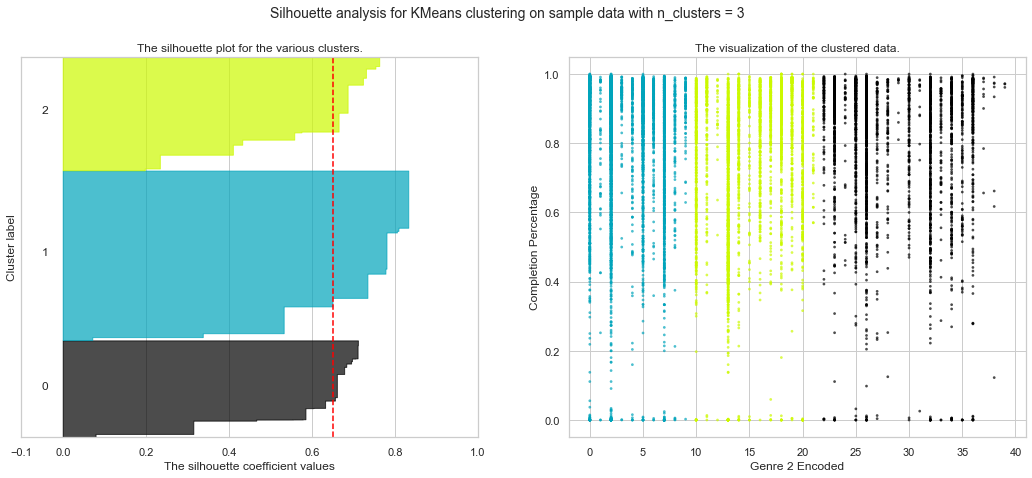

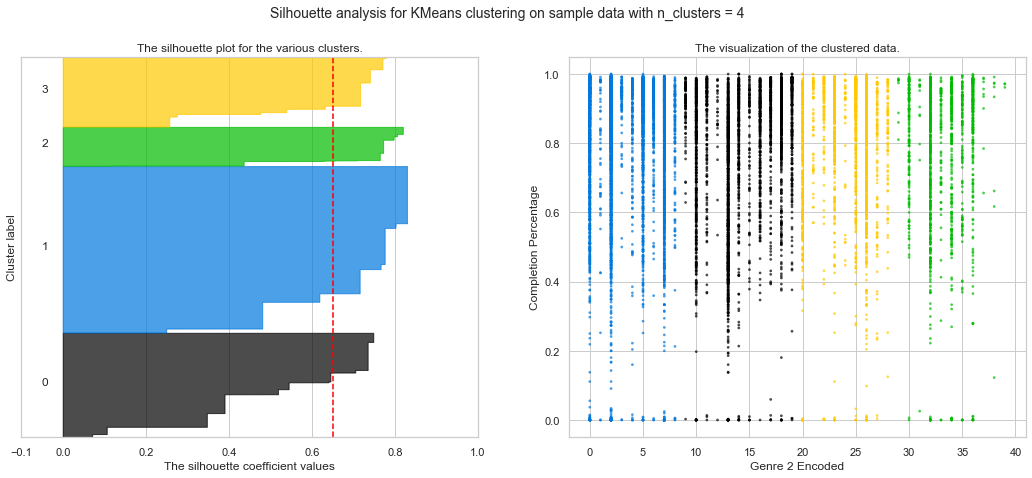

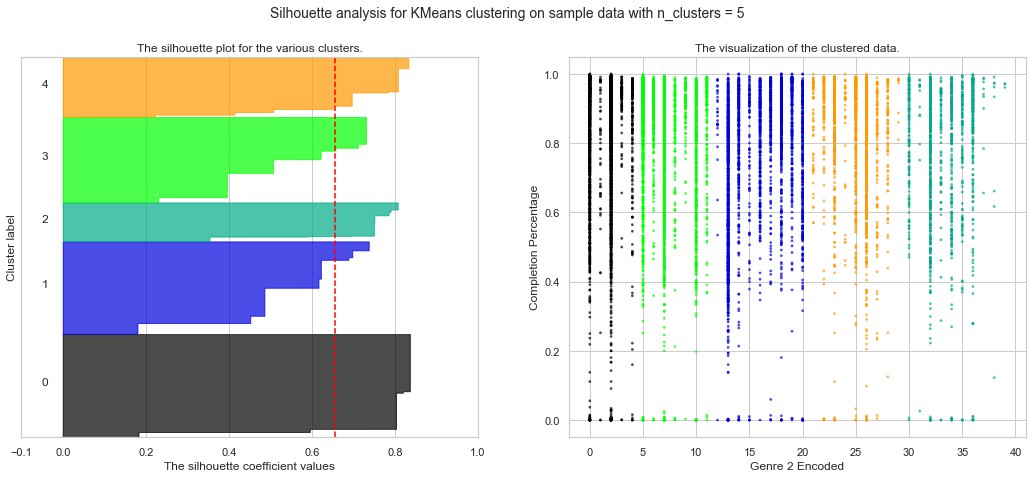

In [44]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y2_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y2_upper = y2_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y2_lower, y2_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y2_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y2_lower = y2_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X2, y2, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Genre 2 Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

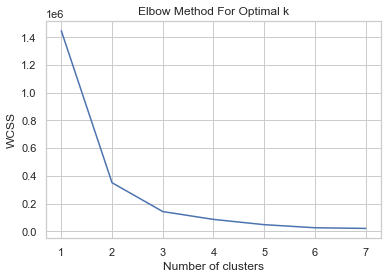

In [45]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1, 8):
    kmeans = KMeans(i)
    kmeans.fit(X2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

numClusters2 = range(1,8)
plt.plot(numClusters2, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [46]:
kmeans = KMeans(4)
kmeans.fit(X2)

KMeans(n_clusters=4)

In [47]:
identified_clusters2 = kmeans.fit_predict(X2)
identified_clusters2

array([1, 1, 0, ..., 2, 3, 1])

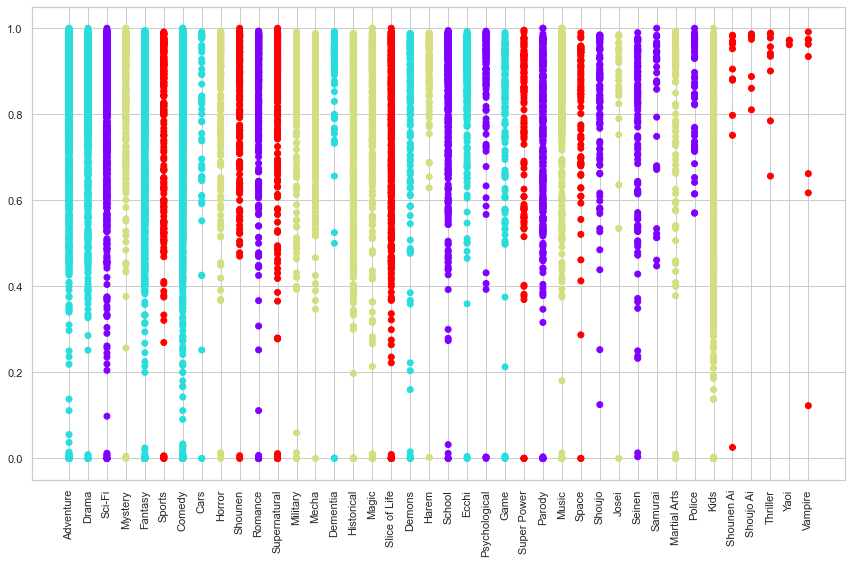

In [48]:
# Scatter plot for showing genres in different clusters
data_with_clusters2 = genre2_completePrc.copy()
data_with_clusters2['Clusters'] = identified_clusters2 
plt.scatter(data_with_clusters2['Genre 2'], data_with_clusters2['Completion Percentage'], c = data_with_clusters2['Clusters'], cmap='rainbow')
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [49]:
# Inserting columns for clusters
genre2_completePrc.insert(0, 'Cluster', identified_clusters2, True)

In [50]:
genre2_completePrc.head()

,Cluster,Genre 2,Completion Percentage,Genre 2 Encoded
0,1,Adventure,0.879720,0
1,1,Drama,0.987182,5
2,0,Sci-Fi,0.897122,26
3,2,Mystery,0.814715,19
4,1,Fantasy,0.796038,7


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS (GENRE 2)

In [51]:
# Separating Cluster 0 members

cluster0_genre2 = genre2_completePrc.query('Cluster == 0')
print(cluster0_genre2)

# Finding the genres in Cluster 0
cluster0_genre2['Genre 2'].unique()

       Cluster        Genre 2  Completion Percentage  Genre 2 Encoded
2            0         Sci-Fi               0.897122               26
14           0        Romance               0.856916               23
16           0         Sci-Fi               0.726134               26
20           0         Sci-Fi               0.935857               26
29           0         Sci-Fi               0.819233               26
...        ...            ...                    ...              ...
17505        0        Romance               0.983871               23
17513        0  Psychological               0.962311               22
17522        0        Romance               0.000000               23
17537        0         School               0.000000               25
17538        0         Parody               1.000000               20

[2319 rows x 4 columns]


['Sci-Fi', 'Romance', 'School', 'Psychological', 'Parody', 'Shoujo', 'Seinen', 'Samurai', 'Police']
Categories (9, object): ['Sci-Fi', 'Romance', 'School', 'Psychological', ..., 'Shoujo', 'Seinen', 'Samurai', 'Police']

In [52]:
# Separating Cluster 1 members

cluster1_genre2 = genre2_completePrc.query('Cluster == 1')
print(cluster1_genre2)

# Finding the genres in Cluster 1
cluster1_genre2['Genre 2'].unique()

       Cluster    Genre 2  Completion Percentage  Genre 2 Encoded
0            1  Adventure               0.879720                0
1            1      Drama               0.987182                5
4            1    Fantasy               0.796038                7
6            1      Drama               0.779701                5
7            1     Comedy               0.873463                2
...        ...        ...                    ...              ...
17540        1     Demons               0.160000                4
17543        1    Fantasy               0.294118                7
17544        1     Demons               0.222222                4
17556        1    Fantasy               0.000000                7
17561        1    Fantasy               0.000000                7

[5556 rows x 4 columns]


['Adventure', 'Drama', 'Fantasy', 'Comedy', 'Cars', 'Dementia', 'Demons', 'Ecchi', 'Game']
Categories (9, object): ['Adventure', 'Drama', 'Fantasy', 'Comedy', ..., 'Dementia', 'Demons', 'Ecchi', 'Game']

In [53]:
# Separating Cluster 2 members

cluster2_genre2 = genre2_completePrc.query('Cluster == 2')
print(cluster2_genre2)

# Finding the genres in Cluster 2
cluster2_genre2['Genre 2'].unique()

       Cluster       Genre 2  Completion Percentage  Genre 2 Encoded
3            2       Mystery               0.814715               19
9            2        Horror               0.752634               11
19           2      Military               0.837578               17
21           2         Mecha               0.986305               16
24           2         Mecha               0.983895               16
...        ...           ...                    ...              ...
17502        2         Music               0.984848               18
17519        2    Historical               0.300000               10
17532        2  Martial Arts               0.000000               15
17549        2         Magic               0.363636               14
17558        2        Horror               0.000000               11

[3480 rows x 4 columns]


['Mystery', 'Horror', 'Military', 'Mecha', 'Historical', ..., 'Harem', 'Music', 'Josei', 'Martial Arts', 'Kids']
Length: 11
Categories (11, object): ['Mystery', 'Horror', 'Military', 'Mecha', ..., 'Music', 'Josei', 'Martial Arts', 'Kids']

In [54]:
# Separating Cluster 3 members

cluster3_genre2 = genre2_completePrc.query('Cluster == 3')
print(cluster3_genre2)

# Finding the genres in Cluster 3
cluster3_genre2['Genre 2'].unique()

       Cluster        Genre 2  Completion Percentage  Genre 2 Encoded
5            3         Sports               0.752271               34
13           3        Shounen               0.751409               30
17           3   Supernatural               0.827863               36
18           3        Shounen               0.793665               30
31           3   Supernatural               0.855657               36
...        ...            ...                    ...              ...
17534        3   Supernatural               1.000000               36
17536        3        Shounen               1.000000               30
17552        3         Sports               0.986045               34
17555        3          Space               0.000000               33
17560        3  Slice of Life               0.400000               32

[1300 rows x 4 columns]


['Sports', 'Shounen', 'Supernatural', 'Slice of Life', 'Super Power', ..., 'Shounen Ai', 'Shoujo Ai', 'Thriller', 'Yaoi', 'Vampire']
Length: 11
Categories (11, object): ['Sports', 'Shounen', 'Supernatural', 'Slice of Life', ..., 'Shoujo Ai', 'Thriller', 'Yaoi', 'Vampire']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

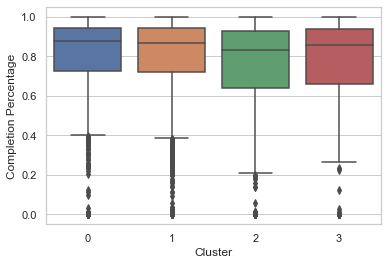

In [55]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = genre2_completePrc)

In [56]:
# Summary Stats of each cluster

print(cluster0_genre2.describe())
print()
print(cluster1_genre2.describe())
print()
print(cluster2_genre2.describe())
print()
print(cluster3_genre2.describe())
print()

       Cluster  Completion Percentage  Genre 2 Encoded
count   2319.0            2319.000000      2319.000000
mean       0.0               0.808232        24.184994
std        0.0               0.191242         2.323459
min        0.0               0.000000        20.000000
25%        0.0               0.727427        23.000000
50%        0.0               0.876052        25.000000
75%        0.0               0.943644        26.000000
max        0.0               1.000000        28.000000

       Cluster  Completion Percentage  Genre 2 Encoded
count   5556.0            5556.000000      5556.000000
mean       1.0               0.796469         3.222282
std        0.0               0.206641         2.554130
min        1.0               0.000000         0.000000
25%        1.0               0.719304         2.000000
50%        1.0               0.867407         2.000000
75%        1.0               0.942826         5.000000
max        1.0               1.000000         8.000000

       C

#### For Genre 2, 'Sci-Fi', 'Romance', 'School', 'Psychological', 'Parody', 'Shoujo', 'Seinen', 'Samurai', 'Police' seem to be the best genres.

#### Genre 3 - Completion Percentage Analysis

In [57]:
genre3_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 3                8666 non-null   object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 887.8+ KB


In [58]:
# Replacing empty cells with NaN
genre3_completePrc.replace(r'^\s*$', np.nan, regex = True)

,Genre 3,Completion Percentage
0,Comedy,0.879720
1,Mystery,0.987182
2,Adventure,0.897122
3,Police,0.814715
4,Shounen,0.796038
...,...,...
17555,Vampire,0.000000
17556,NaN,0.000000
17558,Supernatural,0.000000
17560,Comedy,0.400000


In [59]:
# Removing rows with NaN values
genre3_completePrc = genre3_completePrc.dropna()

In [124]:
genre3_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 17560
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Cluster                8666 non-null   int32   
 1   Genre 3                8666 non-null   category
 2   Completion Percentage  8666 non-null   float64 
 3   Genre 3 Encoded        8666 non-null   int8    
dtypes: category(1), float64(1), int32(1), int8(1)
memory usage: 445.6 KB


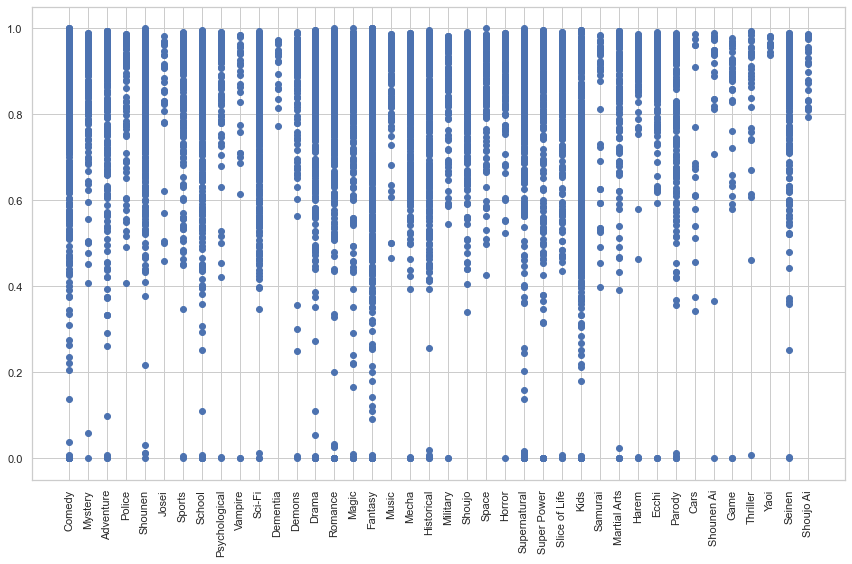

In [61]:
# Scatter plot for Genre 3 with Completion Percentage

plt.scatter(genre3_completePrc['Genre 3'], genre3_completePrc['Completion Percentage'])
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [62]:
# Adding encoded values of genres into dataframe
genre3_completePrc['Genre 3'] = genre3_completePrc['Genre 3'].astype('category')
genre3_completePrc['Genre 3 Encoded'] = genre3_completePrc['Genre 3'].cat.codes
genre3_completePrc

,Genre 3,Completion Percentage,Genre 3 Encoded
0,Comedy,0.879720,2
1,Mystery,0.987182,19
2,Adventure,0.897122,0
3,Police,0.814715,21
4,Shounen,0.796038,30
...,...,...,...
17544,Magic,0.222222,14
17549,Fantasy,0.363636,7
17555,Vampire,0.000000,38
17558,Supernatural,0.000000,36


In [63]:
# Table to see mapping of different types of sources
genre3DFMain = pd.DataFrame(genre3_completePrc[['Genre 3', 'Genre 3 Encoded']])
genre3DFMain.value_counts()

Genre 3        Genre 3 Encoded
Fantasy        7                  869
Comedy         2                  750
Romance        23                 574
Sci-Fi         26                 529
School         25                 506
Drama          5                  450
Supernatural   36                 449
Kids           13                 420
Shounen        30                 387
Mecha          16                 306
Magic          14                 281
Historical     10                 257
Slice of Life  32                 243
Seinen         27                 213
Adventure      0                  203
Super Power    35                 197
Shoujo         28                 196
Ecchi          6                  179
Mystery        19                 175
Sports         34                 157
Parody         20                 143
Military       17                 113
Martial Arts   15                 113
Space          33                 112
Music          18                 112
Horror         11  

## ENCODING

In [64]:
# Label encoding Genre 3's genres

genre3_encoded = le.fit_transform(genre3_completePrc['Genre 3'])
print(genre3_encoded)
print(utils.multiclass.type_of_target(genre3_encoded))
print(utils.multiclass.type_of_target(genre3_encoded.astype('int')))
print(utils.multiclass.type_of_target(genre3_encoded))

[ 2 19  0 ... 38 36  2]
multiclass
multiclass
multiclass


In [65]:
# Initialise X3 and Y3

X3 = genre3_encoded.reshape(-1,1)
y3 = genre3_completePrc['Completion Percentage']

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.5931984229788559
For n_clusters = 4 The average silhouette_score is : 0.6456642281693862
For n_clusters = 5 The average silhouette_score is : 0.6437619602222499


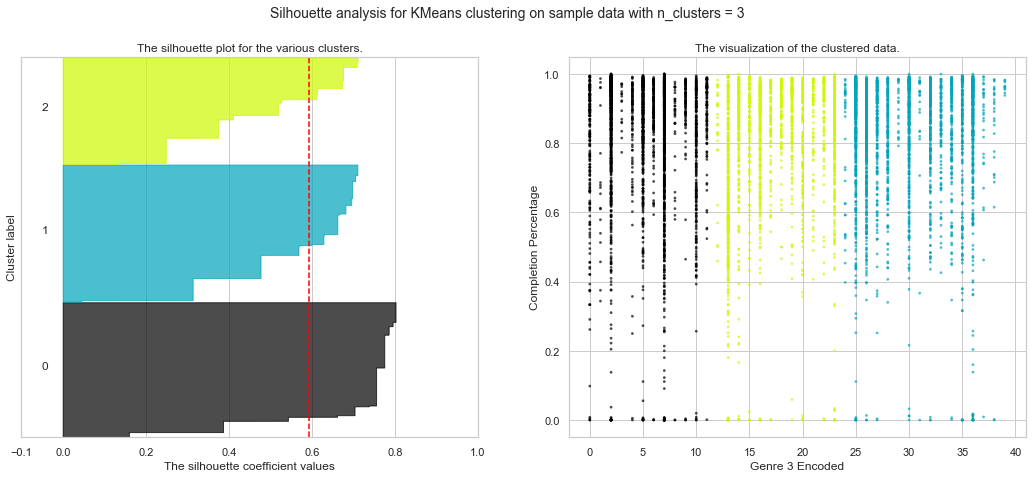

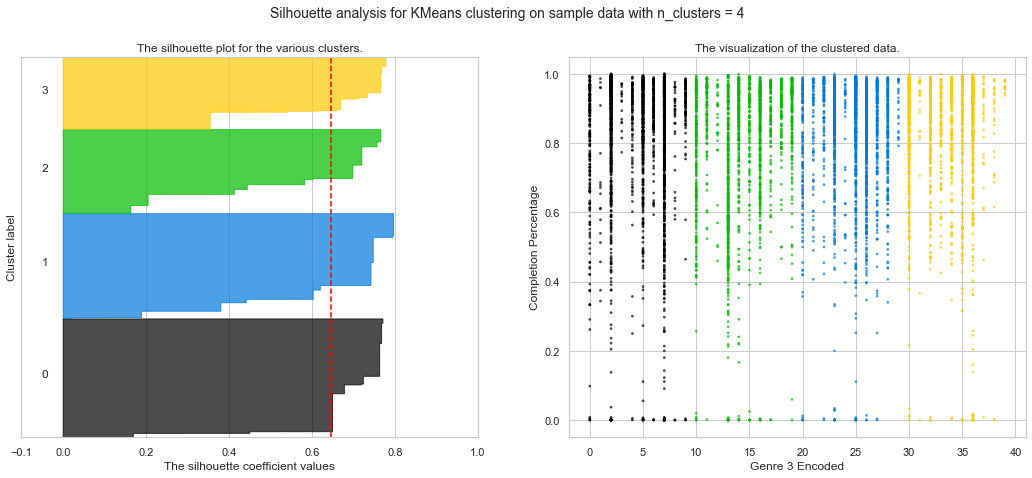

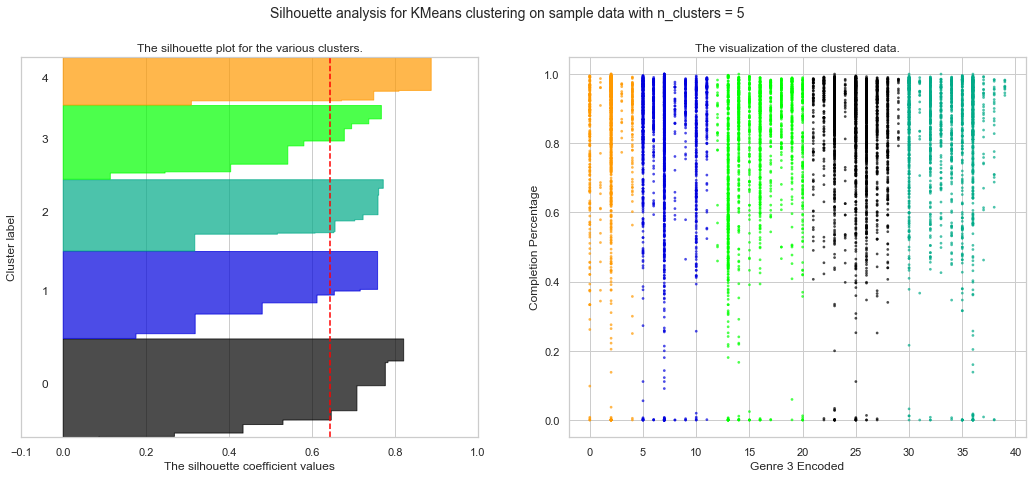

In [66]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X3, cluster_labels)

    y3_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y3_upper = y3_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y3_lower, y3_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y3_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y3_lower = y3_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X3, y3, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Genre 3 Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

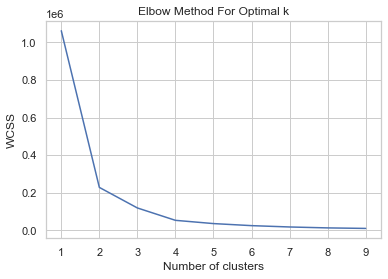

In [67]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(X3)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

numClusters3 = range(1,10)
plt.plot(numClusters3, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [68]:
kmeans = KMeans(4)
kmeans.fit(X3)

KMeans(n_clusters=4)

In [69]:
identified_clusters3 = kmeans.fit_predict(X3)
identified_clusters3

array([1, 3, 1, ..., 0, 0, 1])

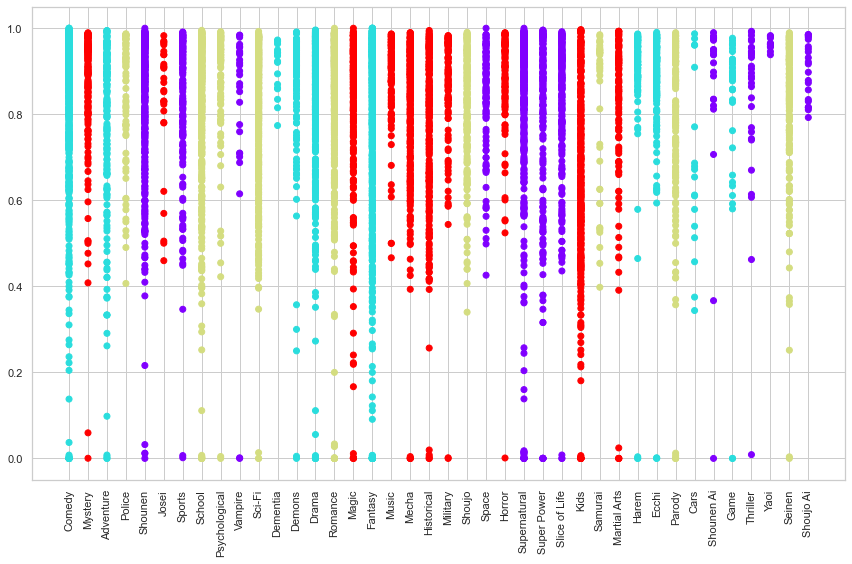

In [70]:
# Scatter plot for showing the different clusters
data_with_clusters3 = genre3_completePrc.copy()
data_with_clusters3['Clusters'] = identified_clusters3 
plt.scatter(data_with_clusters3['Genre 3'], data_with_clusters3['Completion Percentage'], c = data_with_clusters3['Clusters'], cmap='rainbow')
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [71]:
# Inserting cluster column into dataframe
genre3_completePrc.insert(0, 'Cluster', identified_clusters3, True)

In [72]:
genre3_completePrc.head()

,Cluster,Genre 3,Completion Percentage,Genre 3 Encoded
0,1,Comedy,0.879720,2
1,3,Mystery,0.987182,19
2,1,Adventure,0.897122,0
3,2,Police,0.814715,21
4,0,Shounen,0.796038,30


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS (GENRE 3)

In [73]:
# Separating Cluster 0 members

cluster0_genre3 = genre3_completePrc.query('Cluster == 0')
print(cluster0_genre3)

# Finding the genres in Cluster 0
cluster0_genre3['Genre 3'].unique()

       Cluster       Genre 3  Completion Percentage  Genre 3 Encoded
4            0       Shounen               0.796038               30
7            0        Sports               0.873463               34
8            0        Sports               0.953772               34
12           0        Sports               0.751510               34
13           0        Sports               0.751409               34
...        ...           ...                    ...              ...
17513        0  Supernatural               0.962311               36
17533        0  Supernatural               0.000000               36
17540        0  Supernatural               0.160000               36
17555        0       Vampire               0.000000               38
17558        0  Supernatural               0.000000               36

[1658 rows x 4 columns]


['Shounen', 'Sports', 'Vampire', 'Space', 'Supernatural', ..., 'Slice of Life', 'Shounen Ai', 'Thriller', 'Yaoi', 'Shoujo Ai']
Length: 11
Categories (11, object): ['Shounen', 'Sports', 'Vampire', 'Space', ..., 'Shounen Ai', 'Thriller', 'Yaoi', 'Shoujo Ai']

In [74]:
# Separating Cluster 1 members

cluster1_genre3 = genre3_completePrc.query('Cluster == 1')
print(cluster1_genre3)

# Finding the genres in Cluster 1
cluster1_genre3['Genre 3'].unique()

       Cluster    Genre 3  Completion Percentage  Genre 3 Encoded
0            1     Comedy               0.879720                2
2            1  Adventure               0.897122                0
5            1     Comedy               0.752271                2
10           1     Comedy               0.900515                2
11           1     Comedy               0.000102                2
...        ...        ...                    ...              ...
17498        1     Comedy               0.000000                2
17519        1     Demons               0.300000                4
17532        1    Fantasy               0.000000                7
17549        1    Fantasy               0.363636                7
17560        1     Comedy               0.400000                2

[2714 rows x 4 columns]


['Comedy', 'Adventure', 'Dementia', 'Demons', 'Drama', 'Fantasy', 'Harem', 'Ecchi', 'Cars', 'Game']
Categories (10, object): ['Comedy', 'Adventure', 'Dementia', 'Demons', ..., 'Harem', 'Ecchi', 'Cars', 'Game']

In [75]:
# Separating Cluster 2 members

cluster2_genre3 = genre3_completePrc.query('Cluster == 2')
print(cluster2_genre3)

# Finding the genres in Cluster 2
cluster2_genre3['Genre 3'].unique()

       Cluster        Genre 3  Completion Percentage  Genre 3 Encoded
3            2         Police               0.814715               21
14           2         School               0.856916               25
16           2  Psychological               0.726134               22
19           2         Sci-Fi               0.837578               26
21           2  Psychological               0.986305               22
...        ...            ...                    ...              ...
17409        2        Romance               1.000000               23
17454        2        Romance               0.000000               23
17510        2         School               0.000000               25
17528        2         Seinen               0.000000               27
17543        2         School               0.294118               25

[2379 rows x 4 columns]


['Police', 'School', 'Psychological', 'Sci-Fi', 'Romance', 'Shoujo', 'Samurai', 'Parody', 'Seinen']
Categories (9, object): ['Police', 'School', 'Psychological', 'Sci-Fi', ..., 'Shoujo', 'Samurai', 'Parody', 'Seinen']

In [76]:
# Separating Cluster 3 members

cluster3_genre3 = genre3_completePrc.query('Cluster == 3')
print(cluster3_genre3)

# Finding the genres in Cluster 3
cluster3_genre3['Genre 3'].unique()

       Cluster       Genre 3  Completion Percentage  Genre 3 Encoded
1            3       Mystery               0.987182               19
6            3         Josei               0.779701               12
9            3       Mystery               0.752634               19
31           3         Magic               0.855657               14
38           3         Music               0.877207               18
...        ...           ...                    ...              ...
17491        3  Martial Arts               0.000000               15
17502        3         Mecha               0.984848               16
17503        3         Magic               0.000000               14
17534        3         Magic               1.000000               14
17544        3         Magic               0.222222               14

[1915 rows x 4 columns]


['Mystery', 'Josei', 'Magic', 'Music', 'Mecha', 'Historical', 'Military', 'Horror', 'Kids', 'Martial Arts']
Categories (10, object): ['Mystery', 'Josei', 'Magic', 'Music', ..., 'Military', 'Horror', 'Kids', 'Martial Arts']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

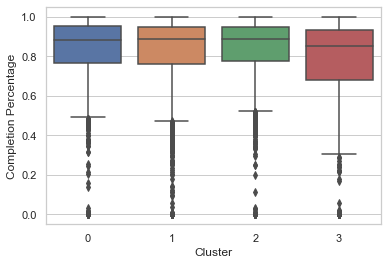

In [77]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = genre3_completePrc)

In [78]:
# Summary Stats of each cluster

print(cluster0_genre3.describe())
print()
print(cluster1_genre3.describe())
print()
print(cluster2_genre3.describe())
print()
print(cluster3_genre3.describe())
print()

       Cluster  Completion Percentage  Genre 3 Encoded
count   1658.0            1658.000000      1658.000000
mean       0.0               0.823411        33.405911
std        0.0               0.188490         2.505495
min        0.0               0.000000        29.000000
25%        0.0               0.766871        31.000000
50%        0.0               0.884414        34.000000
75%        0.0               0.951886        36.000000
max        0.0               1.000000        39.000000

       Cluster  Completion Percentage  Genre 3 Encoded
count   2714.0            2714.000000      2714.000000
mean       1.0               0.816941         4.605748
std        0.0               0.202705         2.527122
min        1.0               0.000000         0.000000
25%        1.0               0.758581         2.000000
50%        1.0               0.889319         5.000000
75%        1.0               0.950537         7.000000
max        1.0               1.000000         9.000000

       C

#### For Genre 3, 'Comedy', 'Adventure', 'Dementia', 'Demons', 'Drama', 'Fantasy', 'Harem', 'Ecchi', 'Cars', 'Game' are the best genres.

#### Genre 4 - Completion Percentage Analysis

In [45]:
genre4_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 4                5344 non-null   object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 887.8+ KB


In [46]:
# Replacing empty cells with NaN value
genre4_completePrc.replace(r'^\s*$', np.nan, regex = True)

,Genre 4,Completion Percentage
0,Drama,0.879720
1,Sci-Fi,0.987182
2,Comedy,0.897122
3,Supernatural,0.814715
4,Supernatural,0.796038
...,...,...
17555,NaN,0.000000
17556,NaN,0.000000
17558,NaN,0.000000
17560,NaN,0.400000


In [47]:
# Dropping rows with NaN values
genre4_completePrc = genre4_completePrc.dropna()

In [48]:
genre4_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 17549
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 4                5344 non-null   object 
 1   Completion Percentage  5344 non-null   float64
dtypes: float64(1), object(1)
memory usage: 125.2+ KB


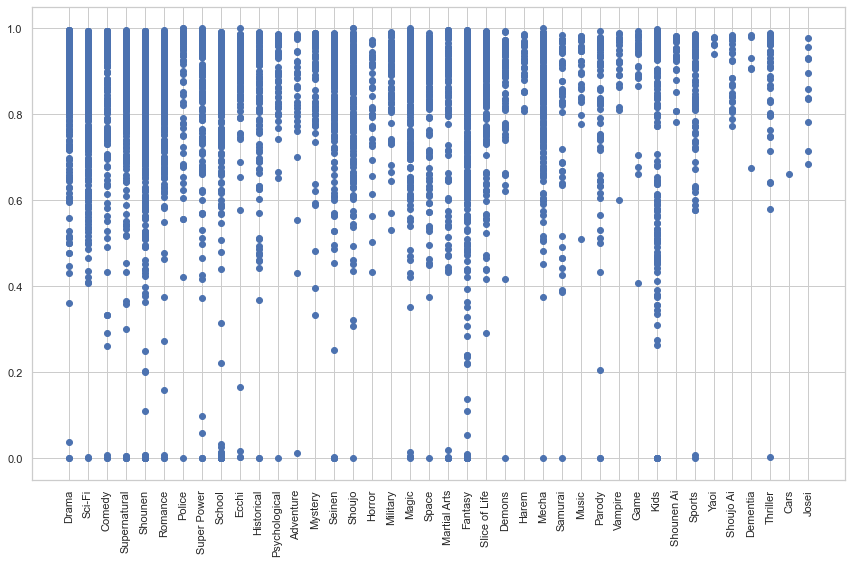

In [49]:
# Scatter plot for Genre 4 with Completion Percentage

plt.scatter(genre4_completePrc['Genre 4'], genre4_completePrc['Completion Percentage'])
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [50]:
# Adding encoded values of genres into dataframe
genre4_completePrc['Genre 4'] = genre4_completePrc['Genre 4'].astype('category')
genre4_completePrc['Genre 4 Encoded'] = genre4_completePrc['Genre 4'].cat.codes
genre4_completePrc

,Genre 4,Completion Percentage,Genre 4 Encoded
0,Drama,0.879720,5
1,Sci-Fi,0.987182,26
2,Comedy,0.897122,2
3,Supernatural,0.814715,36
4,Supernatural,0.796038,36
...,...,...,...
17519,Supernatural,0.300000,36
17532,Shounen,0.000000,30
17540,Romance,0.160000,23
17544,Fantasy,0.222222,7


In [51]:
# Table to see mapping of different types of sources
genre4DFMain = pd.DataFrame(genre4_completePrc[['Genre 4', 'Genre 4 Encoded']])
genre4DFMain.value_counts()

Genre 4        Genre 4 Encoded
Shounen        30                 542
Fantasy        7                  465
Romance        23                 394
Sci-Fi         26                 343
School         25                 336
Drama          5                  297
Supernatural   36                 271
Seinen         27                 229
Magic          14                 216
Shoujo         28                 196
Mecha          16                 181
Kids           13                 167
Comedy         2                  165
Super Power    35                 164
Slice of Life  32                 140
Space          33                 120
Historical     10                 101
Ecchi          6                   98
Martial Arts   15                  91
Sports         34                  90
Military       17                  80
Mystery        19                  73
Police         21                  70
Parody         20                  66
Demons         4                   64
Psychological  22  

## ENCODING

In [52]:
# Label encoding Genre 4's genres

genre4_encoded = le.fit_transform(genre4_completePrc['Genre 4'])
print(genre4_encoded)
print(utils.multiclass.type_of_target(genre4_encoded))
print(utils.multiclass.type_of_target(genre4_encoded.astype('int')))
print(utils.multiclass.type_of_target(genre4_encoded))

[ 5 26  2 ... 23  7 30]
multiclass
multiclass
multiclass


In [53]:
# Initialise X4 and Y4

X4 = genre4_encoded.reshape(-1,1)
y4 = genre4_completePrc['Completion Percentage']

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.6077887023034122
For n_clusters = 4 The average silhouette_score is : 0.6487190690553434
For n_clusters = 5 The average silhouette_score is : 0.6366908148612829


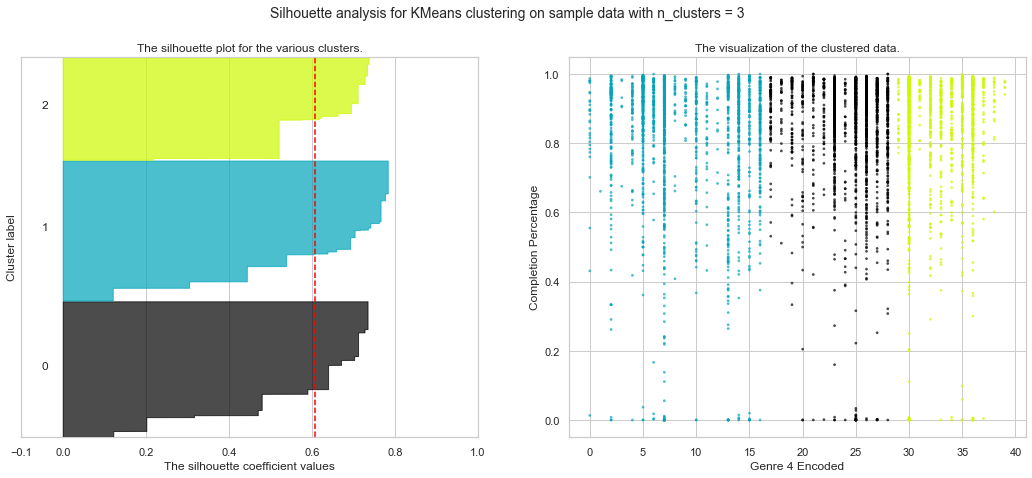

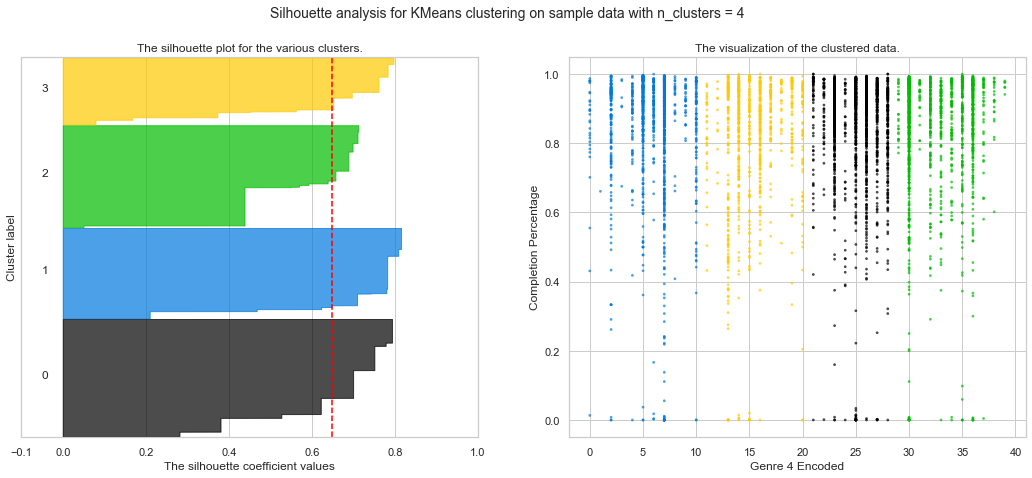

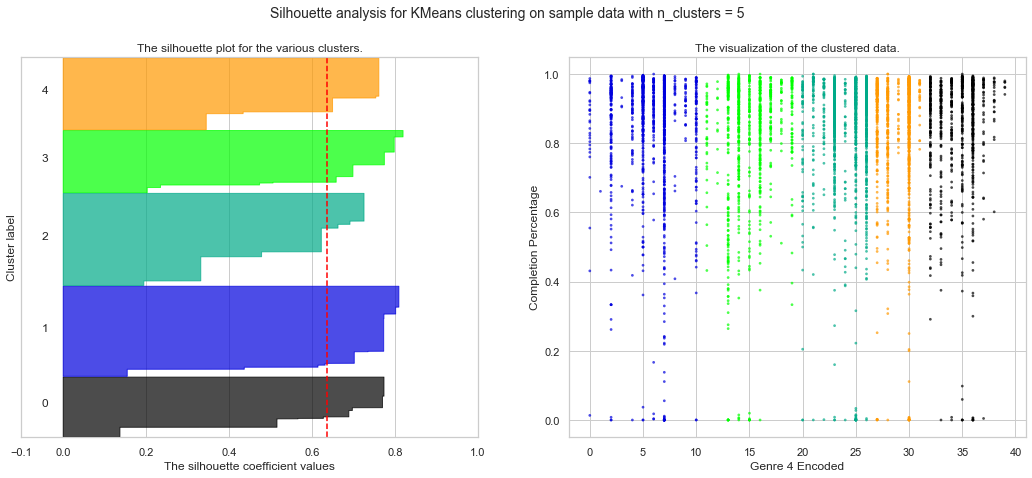

In [54]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X4) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X4, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X4, cluster_labels)

    y4_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y4_upper = y4_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y4_lower, y4_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y4_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y4_lower = y4_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X4, y4, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Genre 4 Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

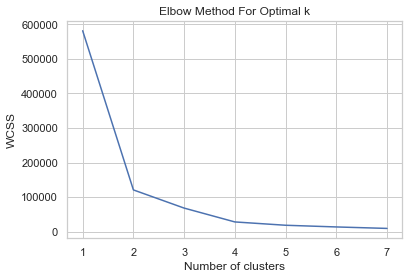

In [55]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1, 8):
    kmeans = KMeans(i)
    kmeans.fit(X4)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

numClusters4 = range(1,8)
plt.plot(numClusters4, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [56]:
kmeans = KMeans(4)
kmeans.fit(X4)

KMeans(n_clusters=4)

In [57]:
identified_clusters4 = kmeans.fit_predict(X4)
identified_clusters4

array([1, 2, 1, ..., 2, 1, 0])

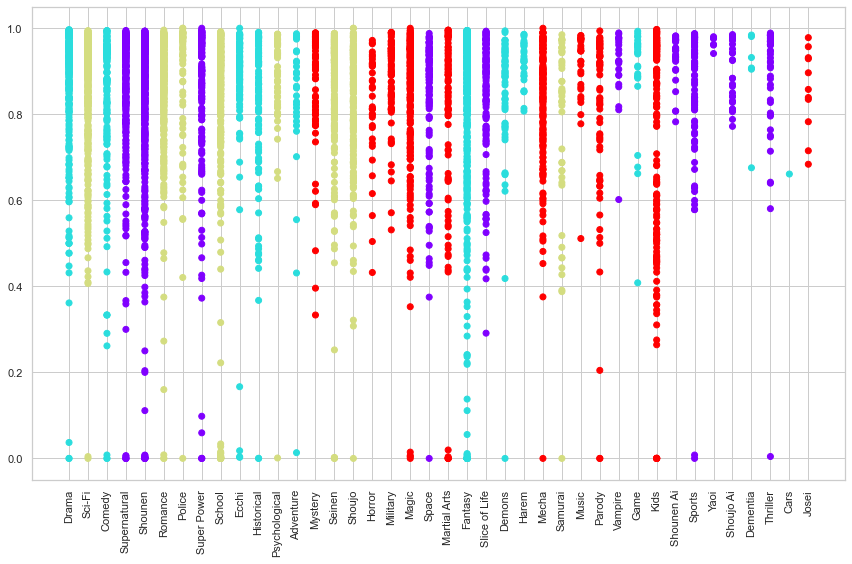

In [58]:
# Scatter plot for shoeing different clusters
data_with_clusters4 = genre4_completePrc.copy()
data_with_clusters4['Clusters'] = identified_clusters4 
plt.scatter(data_with_clusters4['Genre 4'], data_with_clusters4['Completion Percentage'], c = data_with_clusters4['Clusters'], cmap='rainbow')
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [59]:
# Inserting column for cluster
genre4_completePrc.insert(0, 'Cluster', identified_clusters4, True)

In [60]:
genre4_completePrc.head()

,Cluster,Genre 4,Completion Percentage,Genre 4 Encoded
0,1,Drama,0.879720,5
1,2,Sci-Fi,0.987182,26
2,1,Comedy,0.897122,2
3,0,Supernatural,0.814715,36
4,0,Supernatural,0.796038,36


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS (GENRE 4)

In [61]:
# Separating Cluster 0 members

cluster0_genre4 = genre4_completePrc.query('Cluster == 0')
print(cluster0_genre4)

# Finding the genres in Cluster 0
cluster0_genre4['Genre 4'].unique()

       Cluster       Genre 4  Completion Percentage  Genre 4 Encoded
3            0  Supernatural               0.814715               36
4            0  Supernatural               0.796038               36
5            0       Shounen               0.752271               30
7            0       Shounen               0.873463               30
10           0   Super Power               0.900515               35
...        ...           ...                    ...              ...
17408        0       Shounen               0.000000               30
17513        0      Thriller               0.962311               37
17519        0  Supernatural               0.300000               36
17532        0       Shounen               0.000000               30
17549        0       Shounen               0.363636               30

[1447 rows x 4 columns]


['Supernatural', 'Shounen', 'Super Power', 'Space', 'Slice of Life', ..., 'Shounen Ai', 'Sports', 'Yaoi', 'Shoujo Ai', 'Thriller']
Length: 11
Categories (11, object): ['Supernatural', 'Shounen', 'Super Power', 'Space', ..., 'Sports', 'Yaoi', 'Shoujo Ai', 'Thriller']

In [62]:
# Separating Cluster 1 members

cluster1_genre4 = genre4_completePrc.query('Cluster == 1')
print(cluster1_genre4)

# Finding the genres in Cluster 1
cluster1_genre4['Genre 4'].unique()

       Cluster     Genre 4  Completion Percentage  Genre 4 Encoded
0            1       Drama               0.879720                5
2            1      Comedy               0.897122                2
8            1       Drama               0.953772                5
15           1       Ecchi               0.791165                6
16           1       Drama               0.726134                5
...        ...         ...                    ...              ...
17426        1       Drama               0.037037                5
17440        1  Historical               0.000000               10
17491        1     Fantasy               0.000000                7
17503        1     Fantasy               0.000000                7
17544        1     Fantasy               0.222222                7

[1280 rows x 4 columns]


['Drama', 'Comedy', 'Ecchi', 'Historical', 'Adventure', ..., 'Demons', 'Harem', 'Game', 'Dementia', 'Cars']
Length: 11
Categories (11, object): ['Drama', 'Comedy', 'Ecchi', 'Historical', ..., 'Harem', 'Game', 'Dementia', 'Cars']

In [63]:
# Separating Cluster 2 members

cluster2_genre4 = genre4_completePrc.query('Cluster == 2')
print(cluster2_genre4)

# Finding the genres in Cluster 2
cluster2_genre4['Genre 4'].unique()

       Cluster        Genre 4  Completion Percentage  Genre 4 Encoded
1            2         Sci-Fi               0.987182               26
6            2        Romance               0.779701               23
9            2         Police               0.752634               21
12           2         School               0.751510               25
20           2  Psychological               0.935857               22
...        ...            ...                    ...              ...
17454        2         School               0.000000               25
17475        2        Romance               0.888889               23
17476        2        Romance               0.000000               23
17498        2        Romance               0.000000               23
17540        2        Romance               0.160000               23

[1668 rows x 4 columns]


['Sci-Fi', 'Romance', 'Police', 'School', 'Psychological', 'Seinen', 'Shoujo', 'Samurai']
Categories (8, object): ['Sci-Fi', 'Romance', 'Police', 'School', 'Psychological', 'Seinen', 'Shoujo', 'Samurai']

In [64]:
# Separating Cluster 3 members

cluster3_genre4 = genre4_completePrc.query('Cluster == 3')
print(cluster3_genre4)

# Finding the genres in Cluster 3
cluster3_genre4['Genre 4'].unique()

       Cluster       Genre 4  Completion Percentage  Genre 4 Encoded
29           3       Mystery               0.819233               19
36           3        Horror               0.812009               11
39           3      Military               0.846457               17
45           3         Magic               0.891304               14
46           3         Magic               0.951335               14
...        ...           ...                    ...              ...
17398        3  Martial Arts               0.444444               15
17400        3  Martial Arts               0.541667               15
17414        3  Martial Arts               0.000000               15
17428        3  Martial Arts               0.811594               15
17473        3         Magic               1.000000               14

[949 rows x 4 columns]


['Mystery', 'Horror', 'Military', 'Magic', 'Martial Arts', 'Mecha', 'Music', 'Parody', 'Kids', 'Josei']
Categories (10, object): ['Mystery', 'Horror', 'Military', 'Magic', ..., 'Music', 'Parody', 'Kids', 'Josei']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

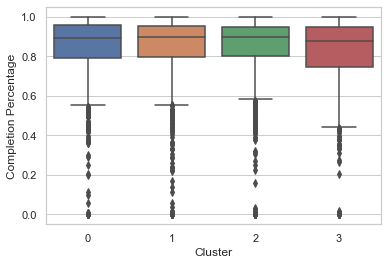

In [65]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = genre4_completePrc)

In [66]:
# Summary Stats of each cluster

print(cluster0_genre4.describe())
print()
print(cluster1_genre4.describe())
print()
print(cluster2_genre4.describe())
print()
print(cluster3_genre4.describe())
print()

       Cluster  Completion Percentage  Genre 4 Encoded
count   1447.0            1447.000000      1447.000000
mean       0.0               0.838091        32.733932
std        0.0               0.178839         2.633249
min        0.0               0.000000        29.000000
25%        0.0               0.792484        30.000000
50%        0.0               0.893880        32.000000
75%        0.0               0.956487        35.000000
max        0.0               1.000000        39.000000

       Cluster  Completion Percentage  Genre 4 Encoded
count   1280.0            1280.000000      1280.000000
mean       1.0               0.831003         5.784375
std        0.0               0.200290         2.288512
min        1.0               0.000000         0.000000
25%        1.0               0.795006         5.000000
50%        1.0               0.899512         6.000000
75%        1.0               0.955461         7.000000
max        1.0               1.000000        10.000000

       C

In [67]:
# Finding the encoded value of missing genre from earlier
cluster1_genre4['Genre 4 Encoded'].unique()

# The missing genre is 'Fantasy'

array([ 5,  2,  6, 10,  0,  7,  4,  9,  8,  3,  1], dtype=int8)

#### For Genre 4, 'Drama', 'Comedy', 'Ecchi', 'Historical', 'Adventure', 'Fantasy', 'Demons', 'Harem', 'Game', 'Dementia', 'Cars' are the best genres in terms of completion percentage.

#### Genre 5 - Completion Percentage Analysis

In [101]:
genre5_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 5                2870 non-null   object 
 1   Completion Percentage  15862 non-null  float64
dtypes: float64(1), object(1)
memory usage: 887.8+ KB


In [102]:
# Replacing empty cells with NaN value
genre5_completePrc.replace(r'^\s*$', np.nan, regex = True)

,Genre 5,Completion Percentage
0,Sci-Fi,0.879720
1,Space,0.987182
2,Drama,0.897122
3,Drama,0.814715
4,NaN,0.796038
...,...,...
17555,NaN,0.000000
17556,NaN,0.000000
17558,NaN,0.000000
17560,NaN,0.400000


In [103]:
# Dropping rows with NaN values
genre5_completePrc = genre5_completePrc.dropna()

In [104]:
genre5_completePrc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2870 entries, 0 to 17544
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre 5                2870 non-null   object 
 1   Completion Percentage  2870 non-null   float64
dtypes: float64(1), object(1)
memory usage: 67.3+ KB


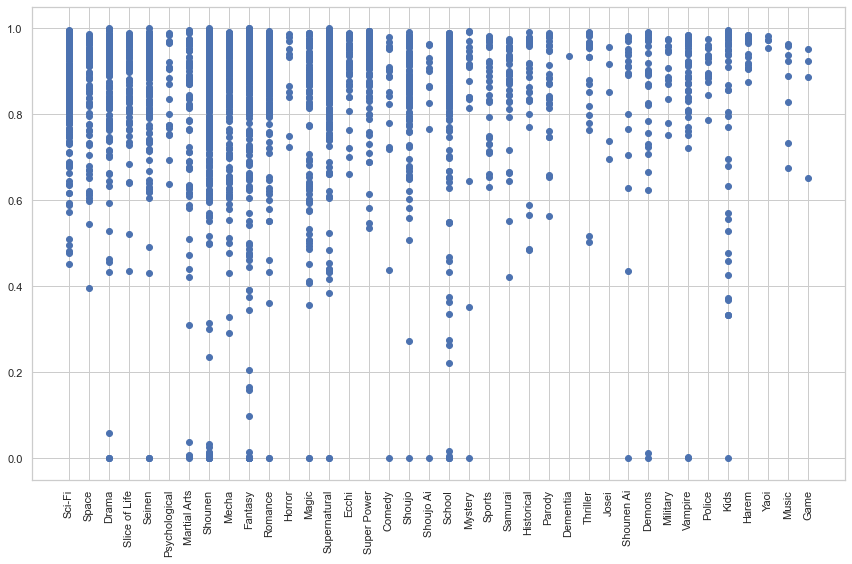

In [105]:
# Scatter plot for Genre 5 with Completion Percentage

plt.scatter(genre5_completePrc['Genre 5'], genre5_completePrc['Completion Percentage'])
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [106]:
# Adding column to show encoded values into dataframe
genre5_completePrc['Genre 5'] = genre5_completePrc['Genre 5'].astype('category')
genre5_completePrc['Genre 5 Encoded'] = genre5_completePrc['Genre 5'].cat.codes
genre5_completePrc

,Genre 5,Completion Percentage,Genre 5 Encoded
0,Sci-Fi,0.879720,24
1,Space,0.987182,31
2,Drama,0.897122,3
3,Drama,0.814715,3
6,Slice of Life,0.779701,30
...,...,...,...
17498,Fantasy,0.000000,5
17513,Shounen,0.962311,28
17519,Shounen,0.300000,28
17540,Fantasy,0.160000,5


In [107]:
# Table to see mapping of different types of sources
genre5DFMain = pd.DataFrame(genre5_completePrc[['Genre 5', 'Genre 5 Encoded']])
genre5DFMain.value_counts()

Genre 5        Genre 5 Encoded
Shounen        28                 470
Fantasy        5                  253
Sci-Fi         24                 217
Supernatural   34                 192
School         23                 181
Romance        21                 162
Seinen         25                 158
Drama          3                  143
Mecha          14                 127
Shoujo         26                 104
Magic          12                  91
Super Power    33                  79
Martial Arts   13                  79
Slice of Life  30                  79
Space          31                  73
Vampire        36                  47
Kids           11                  41
Samurai        22                  41
Ecchi          4                   37
Sports         32                  29
Parody         18                  29
Demons         2                   29
Historical     8                   25
Thriller       35                  22
Psychological  20                  20
Comedy         0   

## ENCODING

In [108]:
# Label encoding Genre 5's genres

genre5_encoded = le.fit_transform(genre5_completePrc['Genre 5'])
print(genre5_encoded)
print(utils.multiclass.type_of_target(genre5_encoded))
print(utils.multiclass.type_of_target(genre5_encoded.astype('int')))
print(utils.multiclass.type_of_target(genre5_encoded))

[24 31  3 ... 28  5 23]
multiclass
multiclass
multiclass


In [109]:
# Initialise X5 and Y5

X5 = genre5_encoded.reshape(-1,1)
y5 = genre5_completePrc['Completion Percentage']

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.6157314563253975
For n_clusters = 4 The average silhouette_score is : 0.6596540035412051
For n_clusters = 5 The average silhouette_score is : 0.6981317361081257


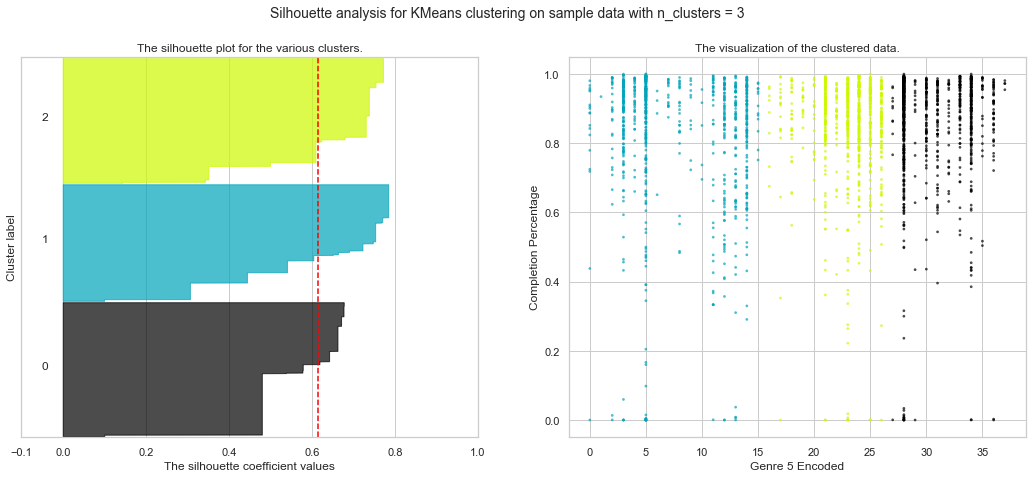

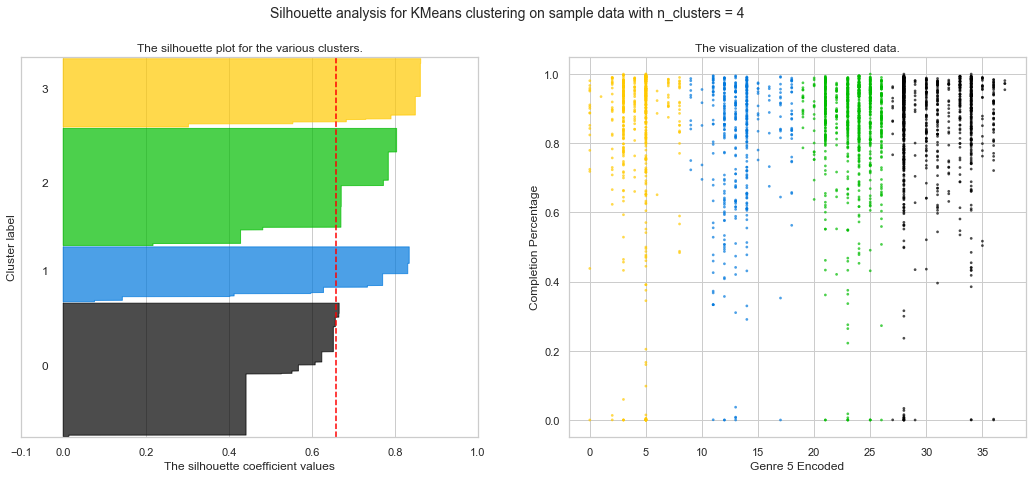

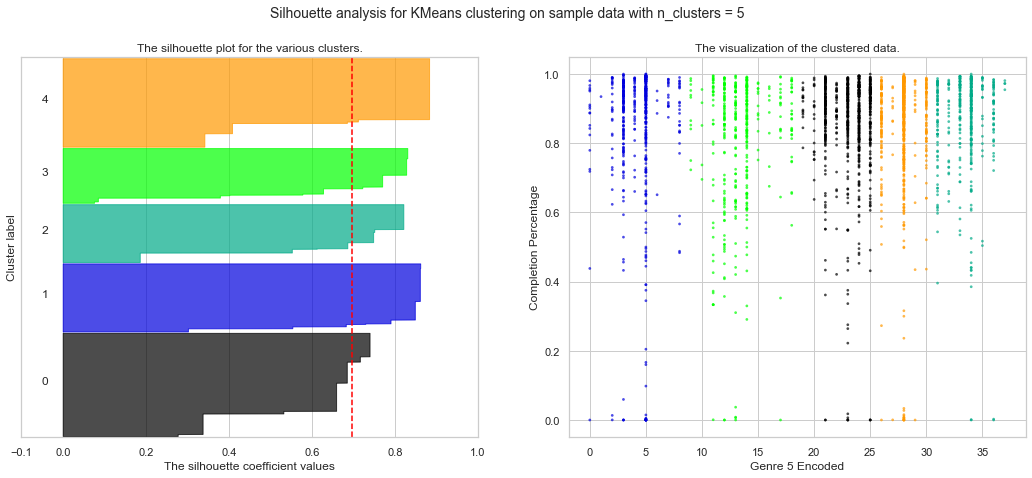

In [110]:
# Silhouette Analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X5) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters) #random_state=10)
    cluster_labels = clusterer.fit_predict(X5)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X5, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X5, cluster_labels)

    y5_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y5_upper = y5_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y5_lower, y5_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y5_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y5_lower = y5_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X5, y5, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Genre 5 Encoded")
    ax2.set_ylabel("Completion Percentage")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14) 

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

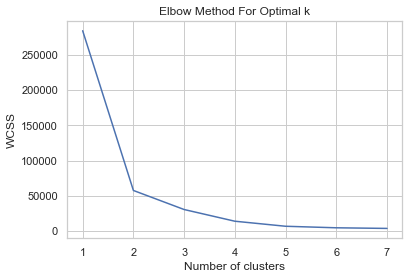

In [111]:
# Elbow Method to figure out best number of clusters

wcss=[]
for i in range(1, 8):
    kmeans = KMeans(i)
    kmeans.fit(X5)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

numClusters5 = range(1,8)
plt.plot(numClusters5, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [112]:
kmeans = KMeans(5)
kmeans.fit(X5)

KMeans(n_clusters=5)

In [113]:
identified_clusters5 = kmeans.fit_predict(X5)
identified_clusters5

array([0, 2, 1, ..., 4, 1, 0])

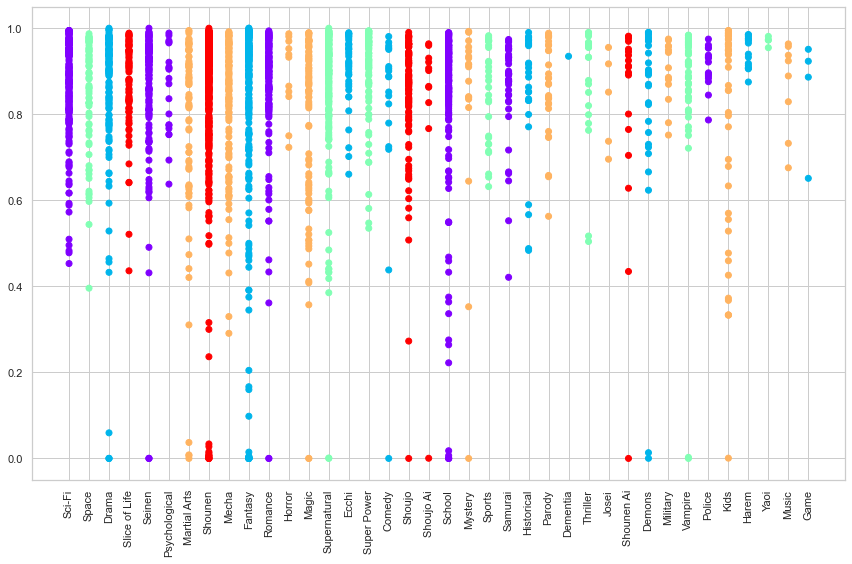

In [114]:
# Scatter plot for showing different clusters
data_with_clusters5 = genre5_completePrc.copy()
data_with_clusters5['Clusters'] = identified_clusters5 
plt.scatter(data_with_clusters5['Genre 5'], data_with_clusters5['Completion Percentage'], c = data_with_clusters5['Clusters'], cmap='rainbow')
plt.xticks(rotation = 90)
plt.tight_layout(rect = [0, 0, 2, 2])
plt.show()

In [115]:
# Inserting column for clusters
genre5_completePrc.insert(0, 'Cluster', identified_clusters5, True)

In [116]:
genre5_completePrc.head()

,Cluster,Genre 5,Completion Percentage,Genre 5 Encoded
0,0,Sci-Fi,0.879720,24
1,2,Space,0.987182,31
2,1,Drama,0.897122,3
3,1,Drama,0.814715,3
6,4,Slice of Life,0.779701,30


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS (GENRE 5)

In [117]:
# Separating Cluster 0 members

cluster0_genre5 = genre5_completePrc.query('Cluster == 0')
print(cluster0_genre5)

# Finding the genres in Cluster 0
cluster0_genre5['Genre 5'].unique()

       Cluster        Genre 5  Completion Percentage  Genre 5 Encoded
0            0         Sci-Fi               0.879720               24
8            0         Seinen               0.953772               25
9            0  Psychological               0.752634               20
15           0         Sci-Fi               0.791165               24
24           0         Sci-Fi               0.983895               24
...        ...            ...                    ...              ...
17352        0        Samurai               0.938687               22
17354        0        Romance               0.361446               21
17407        0         Seinen               0.000000               25
17475        0         School               0.888889               23
17544        0         School               0.222222               23

[795 rows x 4 columns]


['Sci-Fi', 'Seinen', 'Psychological', 'Romance', 'School', 'Samurai', 'Police']
Categories (7, object): ['Sci-Fi', 'Seinen', 'Psychological', 'Romance', 'School', 'Samurai', 'Police']

In [118]:
# Separating Cluster 1 members

cluster1_genre5 = genre5_completePrc.query('Cluster == 1')
print(cluster1_genre5)

# Finding the genres in Cluster 1
cluster1_genre5['Genre 5'].unique()

       Cluster  Genre 5  Completion Percentage  Genre 5 Encoded
2            1    Drama               0.897122                3
3            1    Drama               0.814715                3
11           1    Drama               0.000102                3
19           1    Drama               0.837578                3
20           1    Drama               0.935857                3
...        ...      ...                    ...              ...
17414        1  Fantasy               0.000000                5
17428        1  Fantasy               0.811594                5
17473        1  Fantasy               1.000000                5
17498        1  Fantasy               0.000000                5
17540        1  Fantasy               0.160000                5

[525 rows x 4 columns]


['Drama', 'Fantasy', 'Ecchi', 'Comedy', 'Historical', 'Dementia', 'Demons', 'Harem', 'Game']
Categories (9, object): ['Drama', 'Fantasy', 'Ecchi', 'Comedy', ..., 'Dementia', 'Demons', 'Harem', 'Game']

In [119]:
# Separating Cluster 2 members

cluster2_genre5 = genre5_completePrc.query('Cluster == 2')
print(cluster2_genre5)

# Finding the genres in Cluster 2
cluster2_genre5['Genre 5'].unique()

       Cluster       Genre 5  Completion Percentage  Genre 5 Encoded
1            2         Space               0.987182               31
30           2  Supernatural               0.951727               34
32           2  Supernatural               0.941212               34
56           2   Super Power               0.896845               33
57           2   Super Power               0.954469               33
...        ...           ...                    ...              ...
16725        2      Thriller               0.878648               35
16879        2  Supernatural               0.000000               34
16932        2  Supernatural               0.418182               34
16943        2         Space               0.760563               31
17162        2  Supernatural               0.440299               34

[446 rows x 4 columns]


['Space', 'Supernatural', 'Super Power', 'Sports', 'Thriller', 'Vampire', 'Yaoi']
Categories (7, object): ['Space', 'Supernatural', 'Super Power', 'Sports', 'Thriller', 'Vampire', 'Yaoi']

In [120]:
# Separating Cluster 3 members

cluster3_genre5 = genre5_completePrc.query('Cluster == 3')
print(cluster3_genre5)

# Finding the genres in Cluster 3
cluster3_genre5['Genre 5'].unique()

       Cluster       Genre 5  Completion Percentage  Genre 5 Encoded
10           3  Martial Arts               0.900515               13
22           3         Mecha               0.991865               14
25           3  Martial Arts               0.968029               13
28           3        Horror               0.987118                9
29           3         Magic               0.819233               12
...        ...           ...                    ...              ...
17348        3  Martial Arts               0.633333               13
17369        3  Martial Arts               0.724852               13
17411        3  Martial Arts               0.473684               13
17426        3  Martial Arts               0.037037               13
17440        3  Martial Arts               0.000000               13

[422 rows x 4 columns]


['Martial Arts', 'Mecha', 'Horror', 'Magic', 'Mystery', 'Parody', 'Josei', 'Military', 'Kids', 'Music']
Categories (10, object): ['Martial Arts', 'Mecha', 'Horror', 'Magic', ..., 'Josei', 'Military', 'Kids', 'Music']

In [121]:
# Separating Cluster 4 members

cluster4_genre5 = genre5_completePrc.query('Cluster == 4')
print(cluster4_genre5)

# Finding the genres in Cluster 4
cluster4_genre5['Genre 5'].unique()

       Cluster        Genre 5  Completion Percentage  Genre 5 Encoded
6            4  Slice of Life               0.779701               30
12           4        Shounen               0.751510               28
33           4        Shounen               0.857797               28
38           4  Slice of Life               0.877207               30
41           4        Shounen               0.856254               28
...        ...            ...                    ...              ...
17321        4        Shounen               0.000000               28
17362        4        Shounen               0.600000               28
17454        4        Shounen               0.000000               28
17513        4        Shounen               0.962311               28
17519        4        Shounen               0.300000               28

[682 rows x 4 columns]


['Slice of Life', 'Shounen', 'Shoujo', 'Shoujo Ai', 'Shounen Ai']
Categories (5, object): ['Slice of Life', 'Shounen', 'Shoujo', 'Shoujo Ai', 'Shounen Ai']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

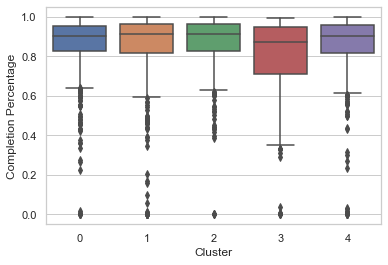

In [122]:
# Boxplot of the clusters

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = genre5_completePrc)

## OVERALL SUMMARY STATS

In [123]:
# Summary Stats of each cluster

print(cluster0_genre5.describe())
print()
print(cluster1_genre5.describe())
print()
print(cluster2_genre5.describe())
print()
print(cluster3_genre5.describe())
print()
print(cluster4_genre5.describe())
print()

       Cluster  Completion Percentage  Genre 5 Encoded
count    795.0             795.000000       795.000000
mean       0.0               0.859055        23.055346
std        0.0               0.152685         1.575779
min        0.0               0.000000        19.000000
25%        0.0               0.826486        22.000000
50%        0.0               0.900137        23.000000
75%        0.0               0.951403        24.000000
max        0.0               1.000000        25.000000

       Cluster  Completion Percentage  Genre 5 Encoded
count    525.0             525.000000       525.000000
mean       1.0               0.835956         4.247619
std        0.0               0.220017         1.591850
min        1.0               0.000000         0.000000
25%        1.0               0.814715         3.000000
50%        1.0               0.914270         5.000000
75%        1.0               0.963774         5.000000
max        1.0               1.000000         8.000000

       C

#### For Genre 5, 'Drama', 'Fantasy', 'Ecchi', 'Comedy', 'Historical', 'Dementia', 'Demons', 'Harem', 'Game' are the best genres with respect to completion percentage.